# **PROBLEM STATEMENT**

The goal of the **System Threat Forecaster** is to predict the probability of a system getting infected by various families of malware, based on different properties of that system. The telemetry data containing these properties and the system infections was generated by threat reports collected by system's antivirus software. They contain the target that indicates whether the system is infected (1) or not infected(0). Early detection of malware infections can help prevent security breaches.

**Aim:**  
To use the training data (`train.csv`) to build a machine learning model that can accurately predict the probability of malware infection for each machine in the test set (`test.csv`), learn attack patterns and help in early detection.
The approach focuses on data preprocessing, feature engineering, and model optimization to achieve the highest predictive performance. 

# IMPORT FREQUENTLY USED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Markdown
import warnings
warnings.filterwarnings("ignore")


# DATA LOADING  


In [2]:
train_data=pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test_data=pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
sample_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/sample_submission.csv")

# Sets the maximum number of rows and columns displayed (prevents excessive truncation)
pd.set_option('display.max_rows', 80) 
pd.set_option('display.max_columns', 80) 

In [3]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [4]:
test_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,1.0,1,218,129455.0,224.0,16,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,249148.0,4.0,5.0,3026.0,953869.0,HDD,134182.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,1.0,5,FullAuto,0,INVALID_LICENSE,Retail,0.0,Retail,486.0,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,2.0,1,68,138510.0,276.0,74,windows8,x64,6.3.0.0,9600,768,windows8.1,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,Home,1.0,0,0.0,333.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189972.0,2.0,5.0,3403.0,715404.0,HDD,695042.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.14393.321,amd64,rs1_release,14393,321,Core,CORE,Update,7.0,30,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,556.0,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,1.0,1,141,154469.0,167.0,227,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,117.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,953869.0,HDD,931858.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,10.0,35,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,1.0,1,41,130775.0,240.0,217,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,117.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,171094.0,4.0,1.0,77.0,953869.0,HDD,455936.0,0,16384.0,Notebook,13.9,1920.0,1080.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,9.0,34,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,1.0,1,43,51125.0,53.0,42,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,35033.0,4.0,5.0,2289.0,715404.0,HDD,50001.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.17134.112,amd64,rs4_release,17134,112,Professional,PROFESSIONAL,Upgrade,37.0,158

#  **EXPLORATORY DATA ANALYSIS**

In [5]:
train_data.shape, test_data.shape

((100000, 76), (10000, 75))

In [6]:
#summary of the dataset
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

### Identify missing values that may require imputation or removal.

In [8]:
display(Markdown("Null values in the Train data"))
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0]) 

Null values in the Train data

SMode                                 981
CityID                                623
RegionIdentifier                      559
IsGamer                               559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
PrimaryDiskCapacityMB                 110
SystemVolumeCapacityMB                110
IEVersionID                           107
ProcessorManufacturerID                85
ProcessorModelID                       85
ProcessorCoreCount                     85
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
NumAntivirusProductsInstalled          76
AntivirusConfigID                 

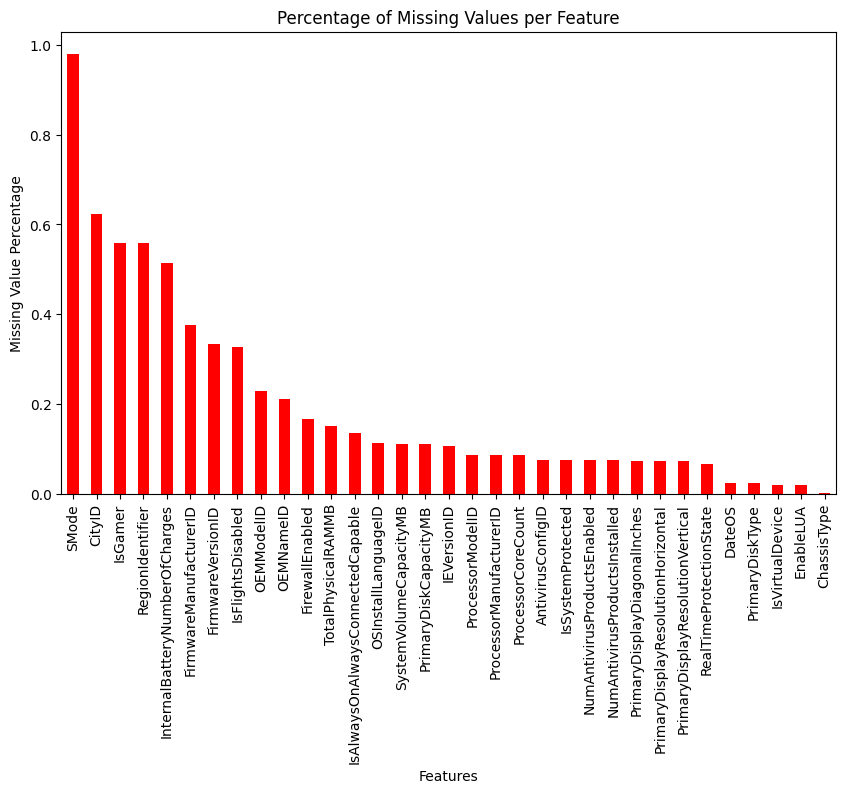

In [9]:
# Calculate and sort the percentage of missing values per feature in descending order
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
# print(missing_percentage)

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='red')
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Missing Value Percentage')
plt.show()


Since the feature with the highest missing value percentage has only 0.98% null values,they need not be dropped as they are insignificant.

In [10]:
display(Markdown("Null values in the Test data"))
display(test_data[test_data.columns[test_data.isnull().any()]].isnull().sum())

Null values in the Test data

RealTimeProtectionState                9
AntivirusConfigID                      2
NumAntivirusProductsInstalled          2
NumAntivirusProductsEnabled            2
CityID                                61
GeoRegionID                            1
IsSystemProtected                      2
SMode                                 92
IEVersionID                           10
FirewallEnabled                       16
OEMNameID                             18
OEMModelID                            21
ProcessorCoreCount                    11
ProcessorManufacturerID               11
ProcessorModelID                      11
PrimaryDiskCapacityMB                 10
PrimaryDiskType                        4
SystemVolumeCapacityMB                10
TotalPhysicalRAMMB                    12
PrimaryDisplayDiagonalInches           6
PrimaryDisplayResolutionHorizontal     6
PrimaryDisplayResolutionVertical       6
InternalBatteryNumberOfCharges        54
OSInstallLanguageID                   14
IsFlightsDisable

In [11]:
test_null_columns = set(test_data.columns[test_data.isnull().any()])
train_null_columns = set(train_data.columns[train_data.isnull().any()])

common_missing_columns = test_null_columns & train_null_columns

test_only_missing_columns = test_null_columns - train_null_columns
train_only_missing_columns = train_null_columns - test_null_columns

print("Columns with missing values in BOTH train and test data:")
print(common_missing_columns)

print("\nColumns with missing values ONLY in test data:")
print(test_only_missing_columns)

print("\nColumns with missing values ONLY in train data:")
print(train_only_missing_columns)


Columns with missing values in BOTH train and test data:
{'SMode', 'AntivirusConfigID', 'RegionIdentifier', 'InternalBatteryNumberOfCharges', 'NumAntivirusProductsInstalled', 'FirmwareManufacturerID', 'IsGamer', 'IEVersionID', 'SystemVolumeCapacityMB', 'ProcessorCoreCount', 'DateOS', 'IsAlwaysOnAlwaysConnectedCapable', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'RealTimeProtectionState', 'PrimaryDisplayResolutionHorizontal', 'IsVirtualDevice', 'OEMModelID', 'NumAntivirusProductsEnabled', 'OSInstallLanguageID', 'CityID', 'PrimaryDisplayDiagonalInches', 'FirmwareVersionID', 'ProcessorManufacturerID', 'IsSystemProtected', 'PrimaryDisplayResolutionVertical', 'IsFlightsDisabled', 'FirewallEnabled', 'PrimaryDiskType', 'TotalPhysicalRAMMB', 'OEMNameID'}

Columns with missing values ONLY in test data:
{'GeoRegionID'}

Columns with missing values ONLY in train data:
{'ChassisType', 'EnableLUA'}


Majority of the missing values are common among the training and testing data

### Unique values in each column

In [12]:
train_data.nunique().sort_values(ascending=False)

MachineID                             99835
SystemVolumeCapacityMB                46188
CityID                                16047
OEMModelID                            15952
FirmwareVersionID                     12299
SignatureVersion                       2735
DateAS                                 2695
AntivirusConfigID                      1976
InternalBatteryNumberOfCharges         1760
ProcessorModelID                       1659
OEMNameID                               837
PrimaryDiskCapacityMB                   398
PrimaryDisplayDiagonalInches            362
OSBuildLab                              281
GeoRegionID                             239
NumericOSVersion                        221
CountryID                               220
OSBuildRevisionOnly                     199
LocaleEnglishNameID                     185
FirmwareManufacturerID                  169
PrimaryDisplayResolutionVertical        131
TotalPhysicalRAMMB                      127
PrimaryDisplayResolutionHorizont

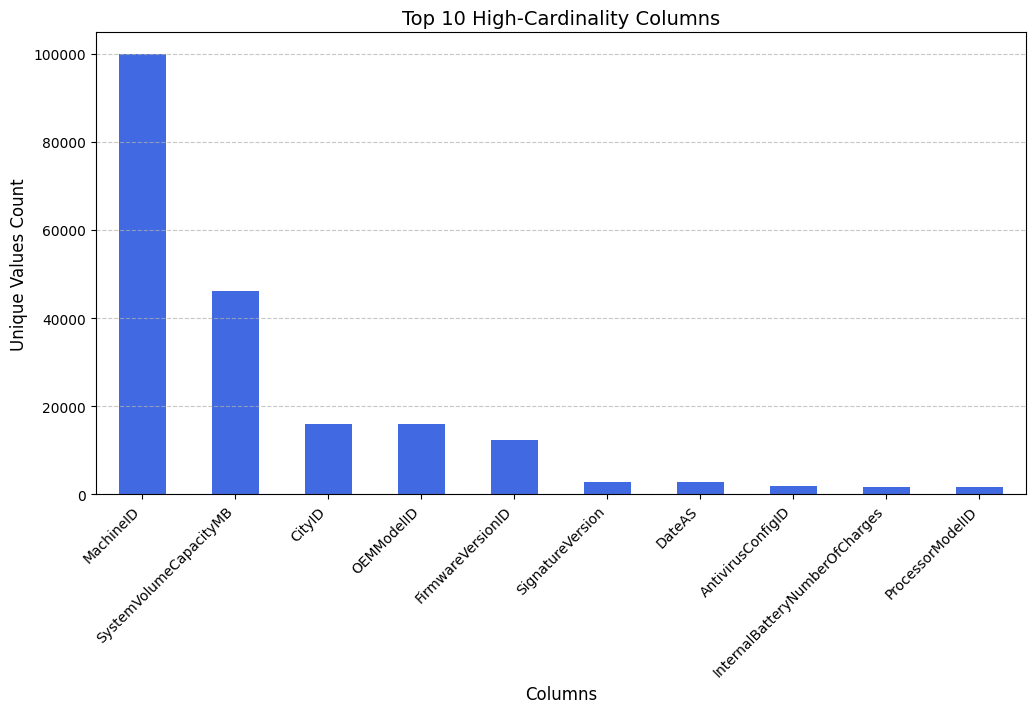

In [13]:
top_10_cardinal_columns = train_data.nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_cardinal_columns.plot(kind='bar', color='royalblue')

# Customize plot
plt.title("Top 10 High-Cardinality Columns", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Unique Values Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

It is observed that `MachineID` has very high cardinality, almost equal to the total number of rows in the dataset. Therefore it can be considered a unique identifier for the dataset, and it is better to remove it from the dataset before training.,

In [14]:
low_variance_cols = [col for col in train_data.columns if train_data[col].nunique() <= 1]
high_variance_cols = [col for col in train_data.columns if train_data[col].nunique() >= 12000]
print(f"Low-variance features: {low_variance_cols}")
print(f"High-variance features: {high_variance_cols}")

Low-variance features: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
High-variance features: ['MachineID', 'CityID', 'OEMModelID', 'SystemVolumeCapacityMB', 'FirmwareVersionID']


In [15]:
train_data[low_variance_cols].head()

,IsBetaUser,AutoSampleSubmissionEnabled,IsFlightsDisabled
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


Since these features contain only a single unique value, they are irrlevant for detecting malware in the system and should be dropped

### Numerical and Categorical features

In [16]:
display(Markdown("**Numerical Features**"))
display(train_data.describe())
display(Markdown("**Categorical Features**"))
display(train_data.describe(include=['object']))

**Numerical Features**

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

**Categorical Features**

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,SKUEditionName,MDC2FormFactor,DeviceFamily,PrimaryDiskType,ChassisType,PowerPlatformRole,NumericOSVersion,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99977,99998,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,8,11,2,4,28,9,221,3,13,20,18,9,6,4,6,7,2695,112
top,8e0523438a5ca48323f50b2c47f6d31a,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Notebook,Windows.Desktop,HDD,Notebook,Mobile,10.0.17134.228,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,62863,64547,99971,66202,59459,69874,17069,91281,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


### Target variable

**The dataset distribution is balanced with respect to the target variable**

target
1    50525
0    49475
Name: count, dtype: int64


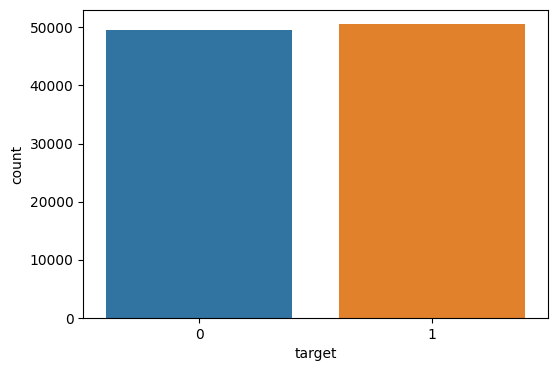

In [17]:
display(Markdown("**The dataset distribution is balanced with respect to the target variable**"))
print(train_data['target'].value_counts())
plt.figure(figsize=(6,4))
rating_value = train_data['target'].value_counts()
sns.countplot(x='target', data=train_data)
plt.show()

Balanced Dataset:
* Malware detected (1): 50.52%
* Malware not detected (0): 49.47%

The dataset is fairly balanced, so we don’t need oversampling or weighting adjustments.

In [18]:
numerical_features = train_data.select_dtypes(include = ['int64','float64'])
categorical_features = train_data.select_dtypes(include = ['object'])
print(f"The data contains {len(categorical_features.columns.tolist())} categorical features and {len(numerical_features.columns.tolist())} numerical features.")
display(Markdown("**Numerical Features**"))
display(numerical_features.head())
display(Markdown("**Categorical Features**"))
display(categorical_features.head())

The data contains 28 categorical features and 48 numerical features.


**Numerical Features**

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,14393,768,1.0,0,0.0,98.0,1.0,1.0,561.0,330367.0,4.0,5.0,1850.0,15028.0,14348.0,0,1024.0,8.0,800.0,1280.0,1.420000e+02,14393,2214,5.0,26,0,0.0,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,0
1,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,25212.0,4.0,5.0,2407.0,953869.0,952592.0,1,4096.0,19.4,1600.0,900.0,4.294967e+09,17134,228,9.0,34,0,0.0,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,1
2,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,17134,768,1.0,0,0.0,137.0,1.0,1.0,3035.0,263666.0,4.0,5.0,2719.0,228936.0,228321.0,1,8192.0,24.0,1920.0,1080.0,4.294967e+09,17134,285,5.0,26,0,0.0,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,1
3,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,15063,768,1.0,0,0.0,108.0,1.0,1.0,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,1890776.0,0,8192.0,15.5,1366.0,768.0,0.000000e+00,15063,850,7.0,30,0,0.0,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,1
4,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,17134,256,1.0,0,0.0,137.0,1.0,1.0,2668.0,257309.0,2.0,5.0,4322.0,305245.0,52804.0,0,2048.0,20.0,1600.0,900.0,4.294967e+09,17134,285,37.0,158,0,0.0,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,0


**Categorical Features**

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,SKUEditionName,MDC2FormFactor,DeviceFamily,PrimaryDiskType,ChassisType,PowerPlatformRole,NumericOSVersion,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,windows10,x86,10.0.0.0,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,SmallTablet,Windows.Desktop,SSD,Notebook,Slate,10.0.14393.2214,x86,rs1_release,Core,CORE,Update,UNKNOWN,IS_GENUINE,Retail,Retail,2018-09-10 10:11:00,2018-04-17
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,AllInOne,Windows.Desktop,HDD,AllinOne,Desktop,10.0.17134.228,amd64,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,OEM:DM,Retail,2018-08-16 00:01:00,2018-08-14
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,Desktop,Windows.Desktop,SSD,Desktop,Desktop,10.0.17134.285,amd64,rs4_release,Core,CORE,Reset,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,2018-09-20 23:20:00,2018-09-11
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,windows10,x64,10.0.0.0,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,Notebook,Windows.Desktop,HDD,Notebook,Mobile,10.0.15063.850,amd64,rs2_release,Core,CORE,Upgrade,UNKNOWN,IS_GENUINE,OEM:DM,Retail,2018-09-14 00:32:00,2018-01-03
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,windows10,x86,10.0.0.0,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,Desktop,Windows.Desktop,HDD,Desktop,Desktop,10.0.17134.285,x86,rs4_release,Professional,PROFESSIONAL,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-09-15 19:34:00,2018-09-11


### Outliers

In [19]:
# Extract numerical columns (excluding target)
num_cols = train_data.select_dtypes(include=['number']).drop(columns=['target']).columns

# Compute the first (Q1) and third quartile (Q3)
q1_vals = train_data[num_cols].quantile(0.25)
q3_vals = train_data[num_cols].quantile(0.75)

# Compute IQR (Interquartile Range)
iqr_vals = q3_vals - q1_vals

# Identify outliers beyond 1.5 * IQR range
outliers= (train_data[num_cols] < (q1_vals - 1.5 * iqr_vals)) | (train_data[num_cols] > (q3_vals + 1.5 * iqr_vals))

# Compute total number of outliers and then its percentage
total_outliers = outliers.sum().sum()
total_data_points = train_data[num_cols].size  # Total numerical values
overall_outlier_pct = (total_outliers / total_data_points) * 100   # Compute overall outlier percentage

# Compute per-column outlier percentage
feature_outlier_counts = outliers.sum()
feature_outlier_pct = (feature_outlier_counts / len(train_data)) * 100

# Rank features by outlier percentage (descending)
sorted_outlier_features = feature_outlier_pct.sort_values(ascending=False)

print(f"Total Outlier Percentage: {overall_outlier_pct:.2f}%\n")
print("Feature-wise Outlier Percentage (Descending):\n")
print(sorted_outlier_features)


Total Outlier Percentage: 3.92%

Feature-wise Outlier Percentage (Descending):

AntivirusConfigID                     19.581
OSBuildNumber                         15.982
OSBuildNumberOnly                     15.449
OSBuildRevisionOnly                   14.258
IsTouchEnabled                        12.847
ProcessorManufacturerID               11.735
ProcessorCoreCount                    11.142
ProcessorModelID                      10.931
PrimaryDisplayDiagonalInches          10.749
OEMNameID                             10.270
HasOpticalDiskDrive                    8.140
TotalPhysicalRAMMB                     7.094
IsAlwaysOnAlwaysConnectedCapable       5.832
IEVersionID                            4.949
IsSystemProtected                      4.464
IsPenCapable                           4.058
RealTimeProtectionState                2.559
NumAntivirusProductsEnabled            2.259
OSInstallLanguageID                    2.256
FirewallEnabled                        1.990
PrimaryDisplayResolu

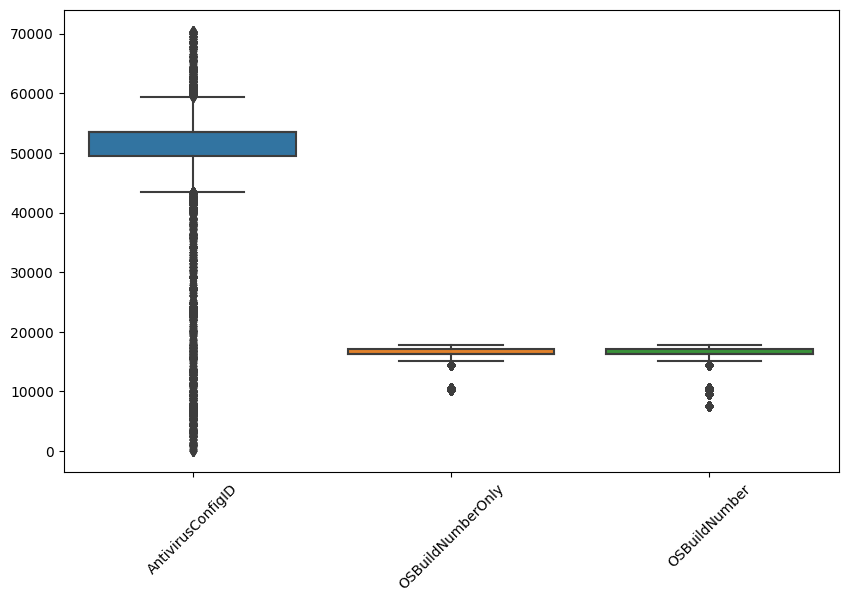

In [20]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=train_data[['AntivirusConfigID','OSBuildNumberOnly','OSBuildNumber']])  
plt.xticks(rotation=45)  
plt.show()

* Since AntivirusConfigID behaves like an ID and has many outliers, it can be considered for dropping if it has very low correlation with the target
* Outlier capping is not being performed because non sensitive tree-based models like XGBoost, LightGBM, and RandomForest are robust to outliers, as data is split based on thresholds rather than being influenced by extreme values.
* Additionally, valuable information that these models can leverage for better decision boundaries may be lost if outliers are removed.

### *Correlation Analysis for Numerical Features with the target*

To identify numerical features that strongly correlate with the target (malware infection).
* Strongly correlated features are good predictors for the model.
* The heatmap visualizes relationships of different features with the target

In [21]:
# Compute correlation with the target variable
correlation_with_target = numerical_features .corr()["target"].abs().sort_values(ascending=False)
print(correlation_with_target.head(20))

target                                1.000000
NumAntivirusProductsInstalled         0.151375
AntivirusConfigID                     0.118304
TotalPhysicalRAMMB                    0.065747
IsAlwaysOnAlwaysConnectedCapable      0.064776
IsSystemProtected                     0.062401
IsGamer                               0.061191
ProcessorCoreCount                    0.056769
PrimaryDiskCapacityMB                 0.049117
RealTimeProtectionState               0.049012
IsTouchEnabled                        0.046142
IsPassiveModeEnabled                  0.041997
NumAntivirusProductsEnabled           0.041547
IsVirtualDevice                       0.039789
OSBuildNumberOnly                     0.038544
PrimaryDisplayDiagonalInches          0.035064
OSBuildNumber                         0.034712
PrimaryDisplayResolutionHorizontal    0.030559
IEVersionID                           0.023820
HasOpticalDiskDrive                   0.022328
Name: target, dtype: float64


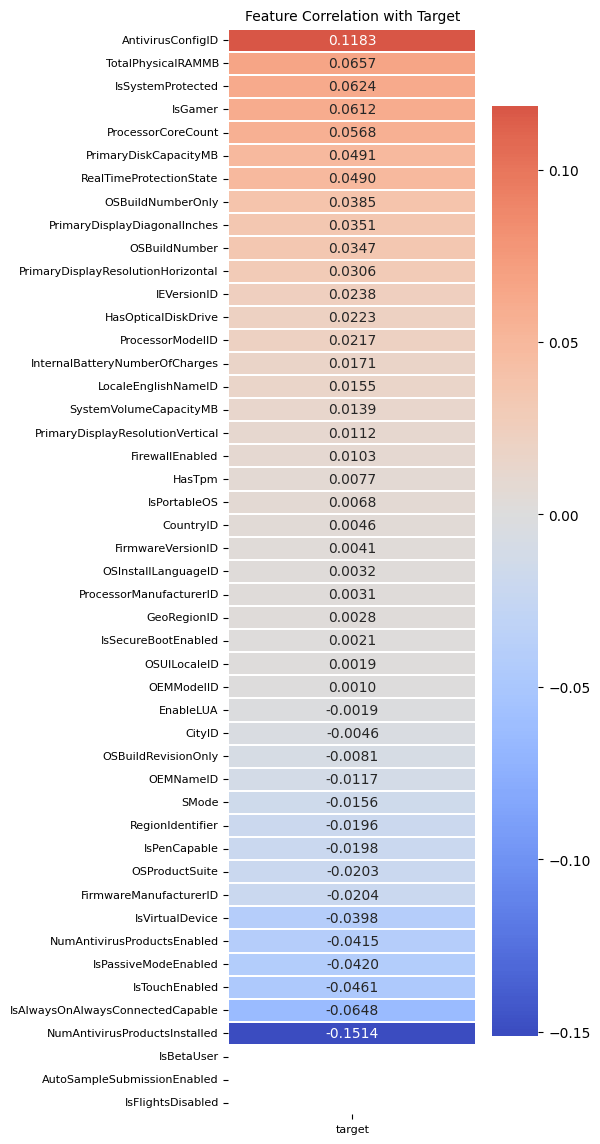

In [22]:
# Compute correlation of all numerical features with target
target_corr = numerical_features.corr()["target"].drop("target")  # drop target -self-correlation
# Convert to DataFrame for seaborn heatmap (change series to dataframe)
target_corr_df = target_corr.to_frame().sort_values(by="target", ascending=False)
plt.figure(figsize=(4, len(target_corr_df) * 0.3))  

sns.heatmap(target_corr_df, cmap="coolwarm", annot=True, fmt=".4f", center=0, linewidths=0.3)

plt.title("Feature Correlation with Target", fontsize=10)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)

plt.show()

### Observations from Correlation Analysis with the target:  

1. **Weak Overall Correlation:** No feature has a strong correlation with the target, indicating that malware infection is influenced by multiple factors rather than a single dominant one.  

2. **Security-Related Features:**  
   - **NumAntivirusProductsInstalled (-0.15)** and **AntivirusConfigID (0.12)** show the highest correlations, suggesting that antivirus configurations and the number of installed antivirus programs may impact malware susceptibility.  
   - **IsSystemProtected (0.06)** and **RealTimeProtectionState (0.05)** indicate that having security protections enabled does not fully eliminate malware risks.  

3. **Hardware Influence:**  
   - **TotalPhysicalRAMMB (0.07)** and **ProcessorCoreCount (0.06)** suggest that system specifications might have a minor effect on malware exposure, possibly due to performance-related security updates or software behavior.  
   - **PrimaryDiskCapacityMB (0.05)** and **PrimaryDisplayDiagonalInches (0.04)** hint at a slight association between system hardware and infection probability.  

4. **OS and System Features:**  
   - OS-related variables (**OSBuildNumber, OSBuildNumberOnly, IEVersionID**) have weak correlations, implying that OS versions alone do not significantly determine infection risk.  
   - **FirewallEnabled (0.01)** has a negligible impact, suggesting that having a firewall alone does not strongly affect malware vulnerability.  

5. **User Behavior and Device Type:**  
   - **IsGamer (0.06)** shows a moderate correlation, indicating that gaming systems may have higher malware exposure, potentially due to riskier software installations.  
   - Features like **IsTouchEnabled (-0.05)** and **IsAlwaysOnAlwaysConnectedCapable (-0.06)** suggest a minor influence of device type on infection likelihood.  

### **Conclusion:**  
Malware infections are likely driven by a mix of system configurations, security settings, and user behavior rather than a single defining factor. A more advanced feature selection or interaction analysis may improve predictive performance.

### *Highest Correlation among Numerical Features*

Highly correlated feature pairs (corr > 0.90):
                 Feature 1                Feature 2  Correlation
0     IsPassiveModeEnabled  RealTimeProtectionState     0.901426
1  RealTimeProtectionState     IsPassiveModeEnabled     0.901426
2        OSBuildNumberOnly            OSBuildNumber     0.947564
3            OSBuildNumber        OSBuildNumberOnly     0.947564
4             OSUILocaleID      OSInstallLanguageID     0.988082
5      OSInstallLanguageID             OSUILocaleID     0.988082
Variance of each feature
IsPassiveModeEnabled       0.017310
RealTimeProtectionState    1.030562
dtype: float64
OSBuildNumberOnly    3.278839e+06
OSBuildNumber        3.776886e+06
dtype: float64
OSInstallLanguageID     102.864893
OSUILocaleID           1999.476612
dtype: float64


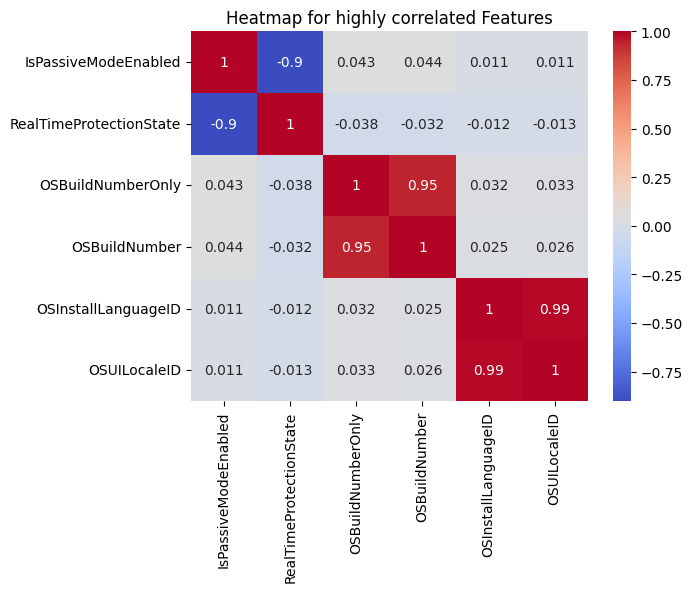

Correlation of new merged features with the target variable:
IsPassiveModeEnabled      -0.041997
RealTimeProtectionState    0.049012
OSBuildNumberOnly          0.038544
OSBuildNumber              0.034712
OSInstallLanguageID        0.003195
OSUILocaleID               0.001936
dtype: float64


In [23]:
# Compute absolute correlation matrix
correlation_matrix = numerical_features.corr().abs()

# Find highly correlated features
threshold = 0.90
high_corr_pairs = []

for col in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if col != index and correlation_matrix.loc[index, col] > threshold :
            high_corr_pairs.append((index, col, correlation_matrix.loc[index, col]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print("Highly correlated feature pairs (corr > 0.90):")
print(high_corr_df)

print('Variance of each feature')
#Compare the variance of the highly correlated features
print(numerical_features[['IsPassiveModeEnabled', 'RealTimeProtectionState']].var())
print(numerical_features[['OSBuildNumberOnly','OSBuildNumber' ]].var())
print(numerical_features[['OSInstallLanguageID','OSUILocaleID' ]].var())
#Lower variance means less informative

features=numerical_features[['IsPassiveModeEnabled', 'RealTimeProtectionState','OSBuildNumberOnly','OSBuildNumber', 'OSInstallLanguageID', 'OSUILocaleID']]
sns.heatmap(features.corr(), annot =  True, cmap = 'coolwarm')
plt.xticks(rotation=90)  
plt.title("Heatmap for highly correlated Features")
plt.show()

# Compute correlation of these features with the target variable
correlation_with_target = train_data[['IsPassiveModeEnabled', 'RealTimeProtectionState','OSBuildNumberOnly','OSBuildNumber', 'OSInstallLanguageID', 'OSUILocaleID']].corrwith(train_data["target"])
print("Correlation of new merged features with the target variable:")
print(correlation_with_target)

In [24]:
features.head()

,IsPassiveModeEnabled,RealTimeProtectionState,OSBuildNumberOnly,OSBuildNumber,OSInstallLanguageID,OSUILocaleID
0,0,7.0,14393,14393,5.0,26
1,0,7.0,17134,17134,9.0,34
2,0,7.0,17134,17134,5.0,26
3,0,7.0,15063,15063,7.0,30
4,0,7.0,17134,17134,37.0,158


# **FURTHER FEATURE ANALYSIS**

## **Numerical Feature analysis**

**In large datasets, filtering numerical features with a correlation threshold of 0.02 removes noise while retaining meaningful patterns for malware prediction**

### Univariate analysis on numerical features

In [25]:
# Compute absolute correlation with the target
correlation_matrix = numerical_features.corr()
target_correlation = correlation_matrix["target"].abs().sort_values(ascending=False)
print(target_correlation.head(25))

selected_numerical_features = [col for col in target_correlation[target_correlation > 0.02].index ]
selected_numerical_features = [col for col in selected_numerical_features if col != "target"]


print(len(selected_numerical_features),selected_numerical_features)


target                                1.000000
NumAntivirusProductsInstalled         0.151375
AntivirusConfigID                     0.118304
TotalPhysicalRAMMB                    0.065747
IsAlwaysOnAlwaysConnectedCapable      0.064776
IsSystemProtected                     0.062401
IsGamer                               0.061191
ProcessorCoreCount                    0.056769
PrimaryDiskCapacityMB                 0.049117
RealTimeProtectionState               0.049012
IsTouchEnabled                        0.046142
IsPassiveModeEnabled                  0.041997
NumAntivirusProductsEnabled           0.041547
IsVirtualDevice                       0.039789
OSBuildNumberOnly                     0.038544
PrimaryDisplayDiagonalInches          0.035064
OSBuildNumber                         0.034712
PrimaryDisplayResolutionHorizontal    0.030559
IEVersionID                           0.023820
HasOpticalDiskDrive                   0.022328
ProcessorModelID                      0.021678
FirmwareManuf

**Univariate analysis on Numerical Features**

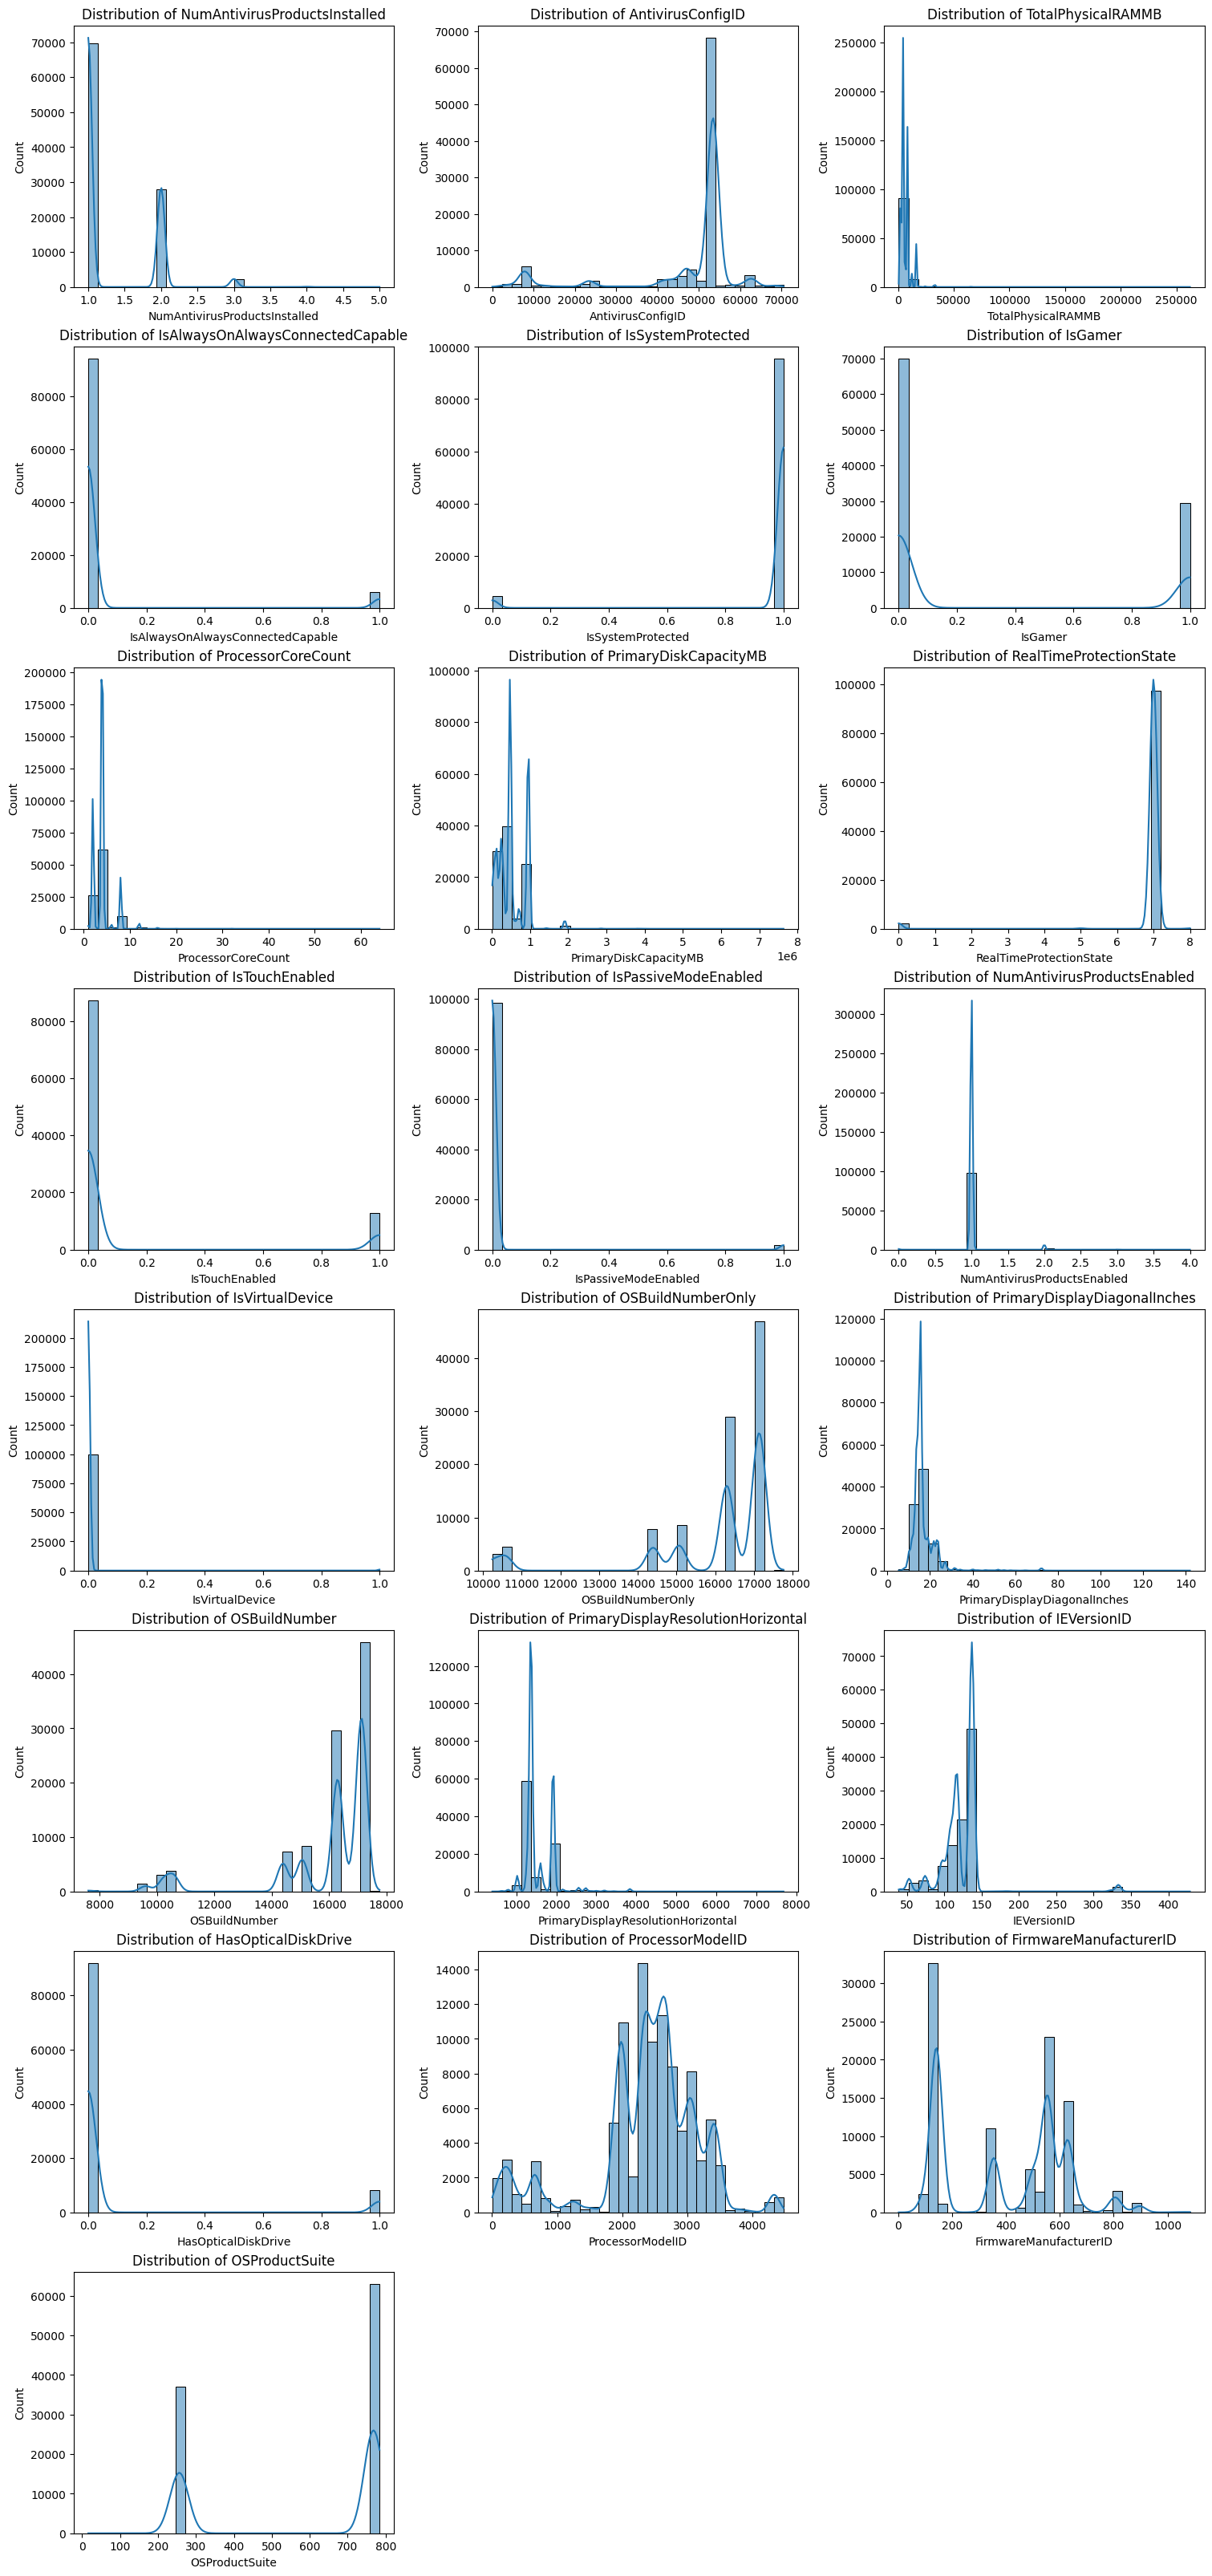

In [26]:
display(Markdown("**Univariate analysis on Numerical Features**"))

cols = 3  # Number of columns in subplot grid
rows = math.ceil(len(selected_numerical_features) / cols)  #number of rows is calculated dynamically

#creates a grid of subplots, adjusts figure size,ensures better spacing between subplots.
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)
#converts the subplot grid into a 1D array to iterate easily
axes = axes.flatten()

# kernel density estimation for smooth density curve,no of bars= 30
for i, col in enumerate(selected_numerical_features):
    sns.histplot(train_data[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")


# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


### **Skewness Analysis**  

#### 1. Left-Skewed (Negatively Skewed) Features 
   - **Features**: `AntivirusConfigID` ,`RealTimeProtectionState`, `OSBuildNumberOnly`, `OSBuildNumber`.`OSProductSuite`
   - **Observation**: Most values are concentrated on the higher end with fewer low-end values.

#### 2. Right-Skewed (Positively Skewed) Features 
   - **Features**: `NumAntivirusProductsInstalled`,`TotalPhysicalRAMMB`,`ProcessorCoreCount`,`PrimaryDiskCapacityMB`,`NumAntivirusProductsEnabled`,`PrimaryDisplayDiagonalInches`,`PrimaryDisplayResolutionHorizontal`,`IEVersionID`
   - **Observation**: Most values are small, but a few high-end systems create a long right tail.

#### 3. Partially Balanced (Multimodal Distribution)
   - **Features**: `ProcessorModelID`, `FirmwareManufacturerID`  
   - **Observation**: These distributions have multiple peaks (multimodal) and exhibit some imbalance, with certain values being significantly more frequent than others. While not heavily skewed, they are not perfectly uniform or normally distributed.

#### 4. Binary Features (Not Skewed, but Imbalanced)  
   - **Features**: `IsAlwaysOnAlwaysConnectedCapable`, `IsSystemProtected`, `IsGamer`,`IsTouchEnabled`, `IsPassiveModeEnabled`, `IsVirtualDevice`,`HasOpticalDiskDrive`
   - **Observation**: These features have values predominantly in one category (0 or 1), making them imbalanced rather than skewed.

### Key Takeaways 
- **Binary features are imbalanced rather than skewed.**
- **Left-Skewed Features:** Most values are high with fewer low values—consider log or power transformation.
- **Right-Skewed Features:** Most values are small, but a few extreme ones stretch the tail—apply log transformation or cap outliers.



### Bivariate analysis on numerical features

**Bivariate analysis on Numerical Features with the target**

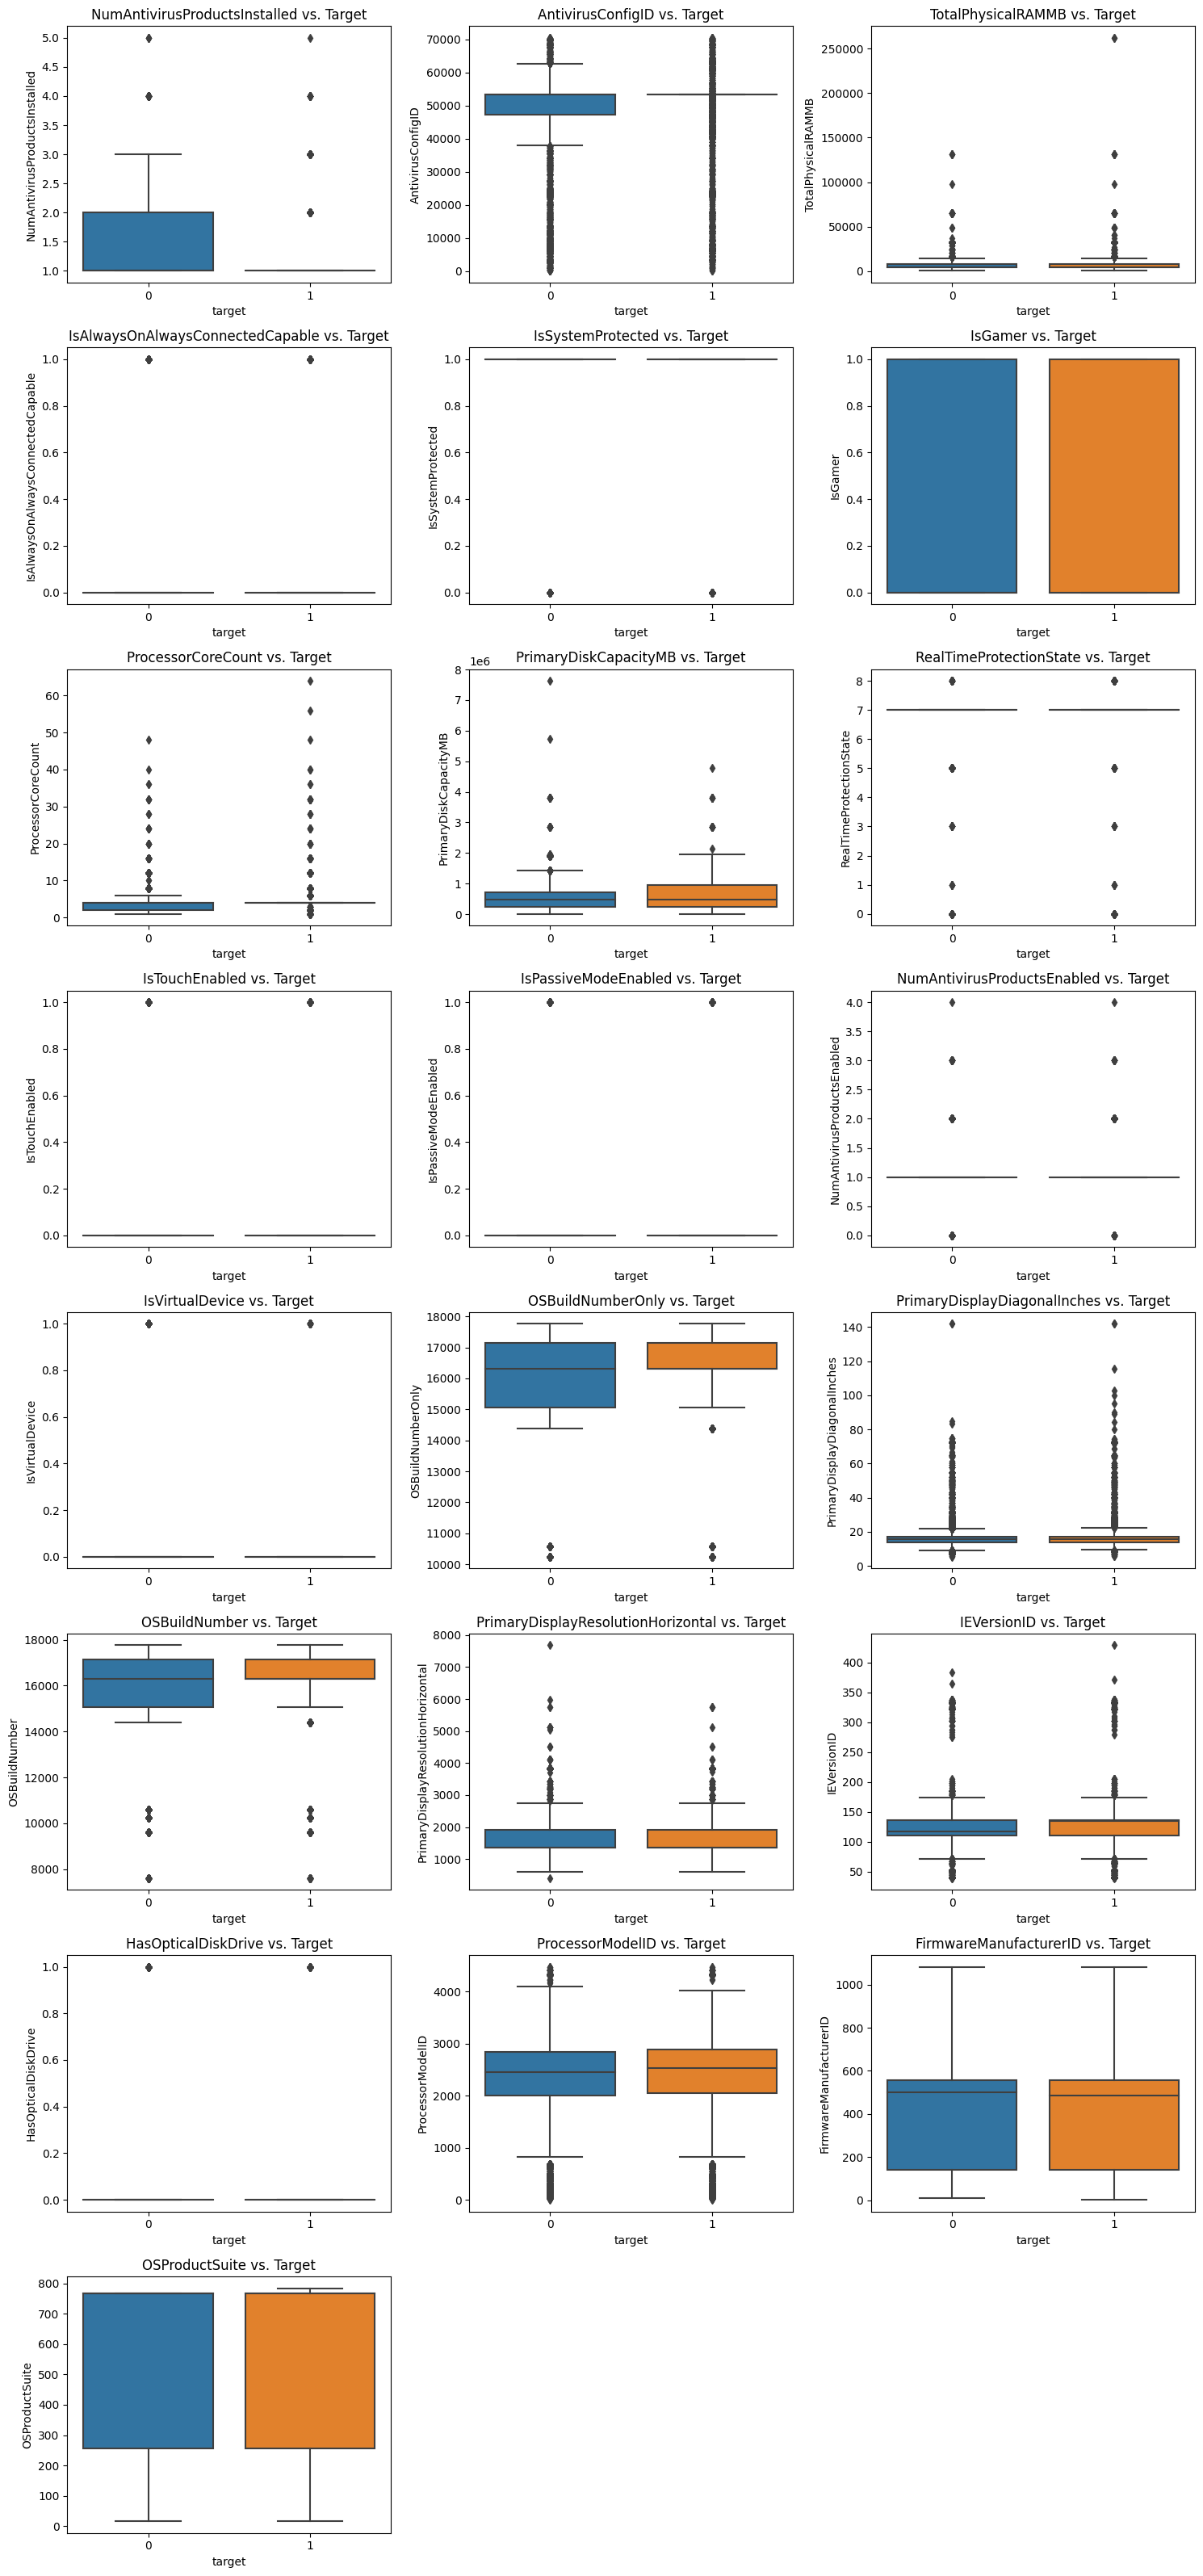

In [27]:
display(Markdown("**Bivariate analysis on Numerical Features with the target**"))

# Determine number of rows and columns dynamically
num_features = len(selected_numerical_features)
cols = 3 
rows = math.ceil(num_features / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each numerical feature against the target
for i, col in enumerate(selected_numerical_features):
    sns.boxplot(x=train_data["target"], y=train_data[col], ax=axes[i])
    axes[i].set_title(f"{col} vs. Target")

# Remove empty subplots (if any)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



### **Key Insights from the Graphs:**
1. **NumAntivirusProductsInstalled vs. Target:** Most systems have only one or two antivirus installed and tend to not be affected by malware, whereas some systems with malware (target = 1) have multiple antivirus products, indicating potential conflicts or ineffective protection.
2. **AntivirusConfigID vs. Target:** The values are widely spread for both target classes, with a similar distribution but many outliers, indicating no strong distinction between infected and non-infected systems.
3. **TotalPhysicalRAMMB vs. Target:** Malware-infected systems tend to have lower RAM in general. Outliers with extremely high RAM are present in both affected and non affected categories.
4. **IsAlwaysOnAlwaysConnectedCapable vs. Target:** Most devices do not have this feature enabled.A few infected systems have it enabled, which might suggest security loopholes in always-connected devices.
5. **IsSystemProtected vs. Target:** Most systems are marked as protected (value= 1). A few systems (both infected and non-infected) lack protection, which might be a vulnerability.
6. **IsGamer vs. Target:** Distribution is fairly balanced.Gamer systems are not disproportionately infected, suggesting gaming-related security threats are not a major factor.
7. **ProcessorCoreCount vs. Target:** Malware-infected systems show a similar distribution of core counts to non-infected ones. Some high-core-count systems are infected, but they are outliers
8. **PrimaryDiskCapacity vs. Target:** The distributions are similar for both target classes, with a few high-value outliers, indicating disk capacity may not be a strong predictor of infection.
9. **RealTimeProtectionState vs. Target:** Most values are concentrated at a few discrete states, showing no significant variation between infected and non-infected systems.
10. **IsTouchEnabled vs. Target:** Very few systems have touch mode enabled. Those that do may be at higher risk of malware.
11. **IsPassiveModeEnabled vs. Target:** Very few systems have passive mode enabled. Those that do may be at higher risk of malware, as passive mode may indicate security software running in a limited state.
12. **NumAntivirusProductsEnabled vs. Target:** Similar to installed antivirus products, most systems have only one enabled. Having multiple enabled may indicate security software conflicts.
13. **IsVirtualDevice vs. Target:** Most devices are physical. Few virtual machines (VMs) appear in both infected and non-infected categories.
14. **OSBuildNumberOnly vs. Target:** Some OS build numbers appear slightly more in infected systems. Older OS builds may be at higher risk due to outdated security patches.
15. **PrimaryDisplayDiagonalInches vs. Target:** Malware distribution is similar across screen sizes. A few large-display devices appear as outliers.
16. **OSBuildNumber vs. Target:** Similar to OSBuildNumberOnly, newer builds may have slightly lower malware risk. A few older OS versions appear more in the infected category.
17. **PrimaryDisplayResolutionHorizontal vs. Target:** Lower-resolution systems seem slightly more prone to malware. High-resolution screens appear in both categories.
18. **IEVersionID vs. Target:** The distribution is nearly identical for both infected and non-infected systems, with similar medians, ranges, and outliers, indicating that the Internet Explorer version does not significantly impact malware infection risk.
19. **HasOpticalDiskDrive vs. Target:** Most systems do not have optical disk drives. Few infected systems have optical drives, indicating CD/DVD-based malware is not a dominant threat.
20. **ProcessorModelID vs. Target:** The distributions for both target classes are nearly identical, with similar medians, ranges, and outliers, suggesting ProcessorModelID does not strongly influence malware infection.
21. **FirmwareManufacturerID vs. Target:** The distributions also appear very similar, indicating that FirmwareManufacturerID has little to no impact on distinguishing between infected and non-infected systems.
22. **OSProductSuite vs. Target:** Some OS suites may have slightly higher infection rates. The feature is balanced and does not exhibit a strong separation between infected and non-infected systems.

### **Key Takeaways**  
- **Antivirus Conflicts:** Systems with multiple antivirus products show no clear benefit in preventing malware.  
- **RAM & Performance:** Lower RAM systems tend to have slightly higher infection rates.  
- **OS Version Impact:** Older OS builds appear more vulnerable, possibly due to outdated security patches.  
- **Security Settings:** A few infected systems have passive security modes or no protection enabled.  
- **Virtual Devices & Always-On Capable Systems:** Rare but present in infected systems, suggesting potential security loopholes.  
- **Screen Size & Resolution:** No strong correlation, but lower-resolution devices may have a slightly higher risk.  
- **Optical Drives:** Not a significant factor in malware infections.  
- **Firmware & Processor Impact:** No significant relationship between firmware manufacturers, processor models, and malware infection rates.

### Features related to malware infection include security settings, OS version, RAM, antivirus conflicts, and resolution, as older OS builds, lower RAM, and passive security modes show higher infection rates. 
### Processor specs, disk capacity, screen size, firmware, and optical drives have no significant impact on malware infection.

## **Categorical Feature Analysis**

**Similarly categorical columns with fewer than 10 unique values are selected for analysis because they are easier to interpret, visualize, and compare against the target variable**

In [28]:
selected_categorical_features = [col for col in train_data.select_dtypes(include=["object", "category"])
                       if train_data[col].nunique() < 10]  
print(selected_categorical_features)
train_data[selected_categorical_features].nunique()

['ProductName', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'SKUEditionName', 'DeviceFamily', 'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing']


ProductName                 2
PlatformType                4
Processor                   3
OSVersion                   7
OsPlatformSubRelease        9
SKUEditionName              8
DeviceFamily                2
PrimaryDiskType             4
PowerPlatformRole           9
OSArchitecture              3
OSInstallType               9
AutoUpdateOptionsName       6
OSGenuineState              4
LicenseActivationChannel    6
FlightRing                  7
dtype: int64

### Univariate analysis on categorical features

**Univariate analysis on Categorical Features**

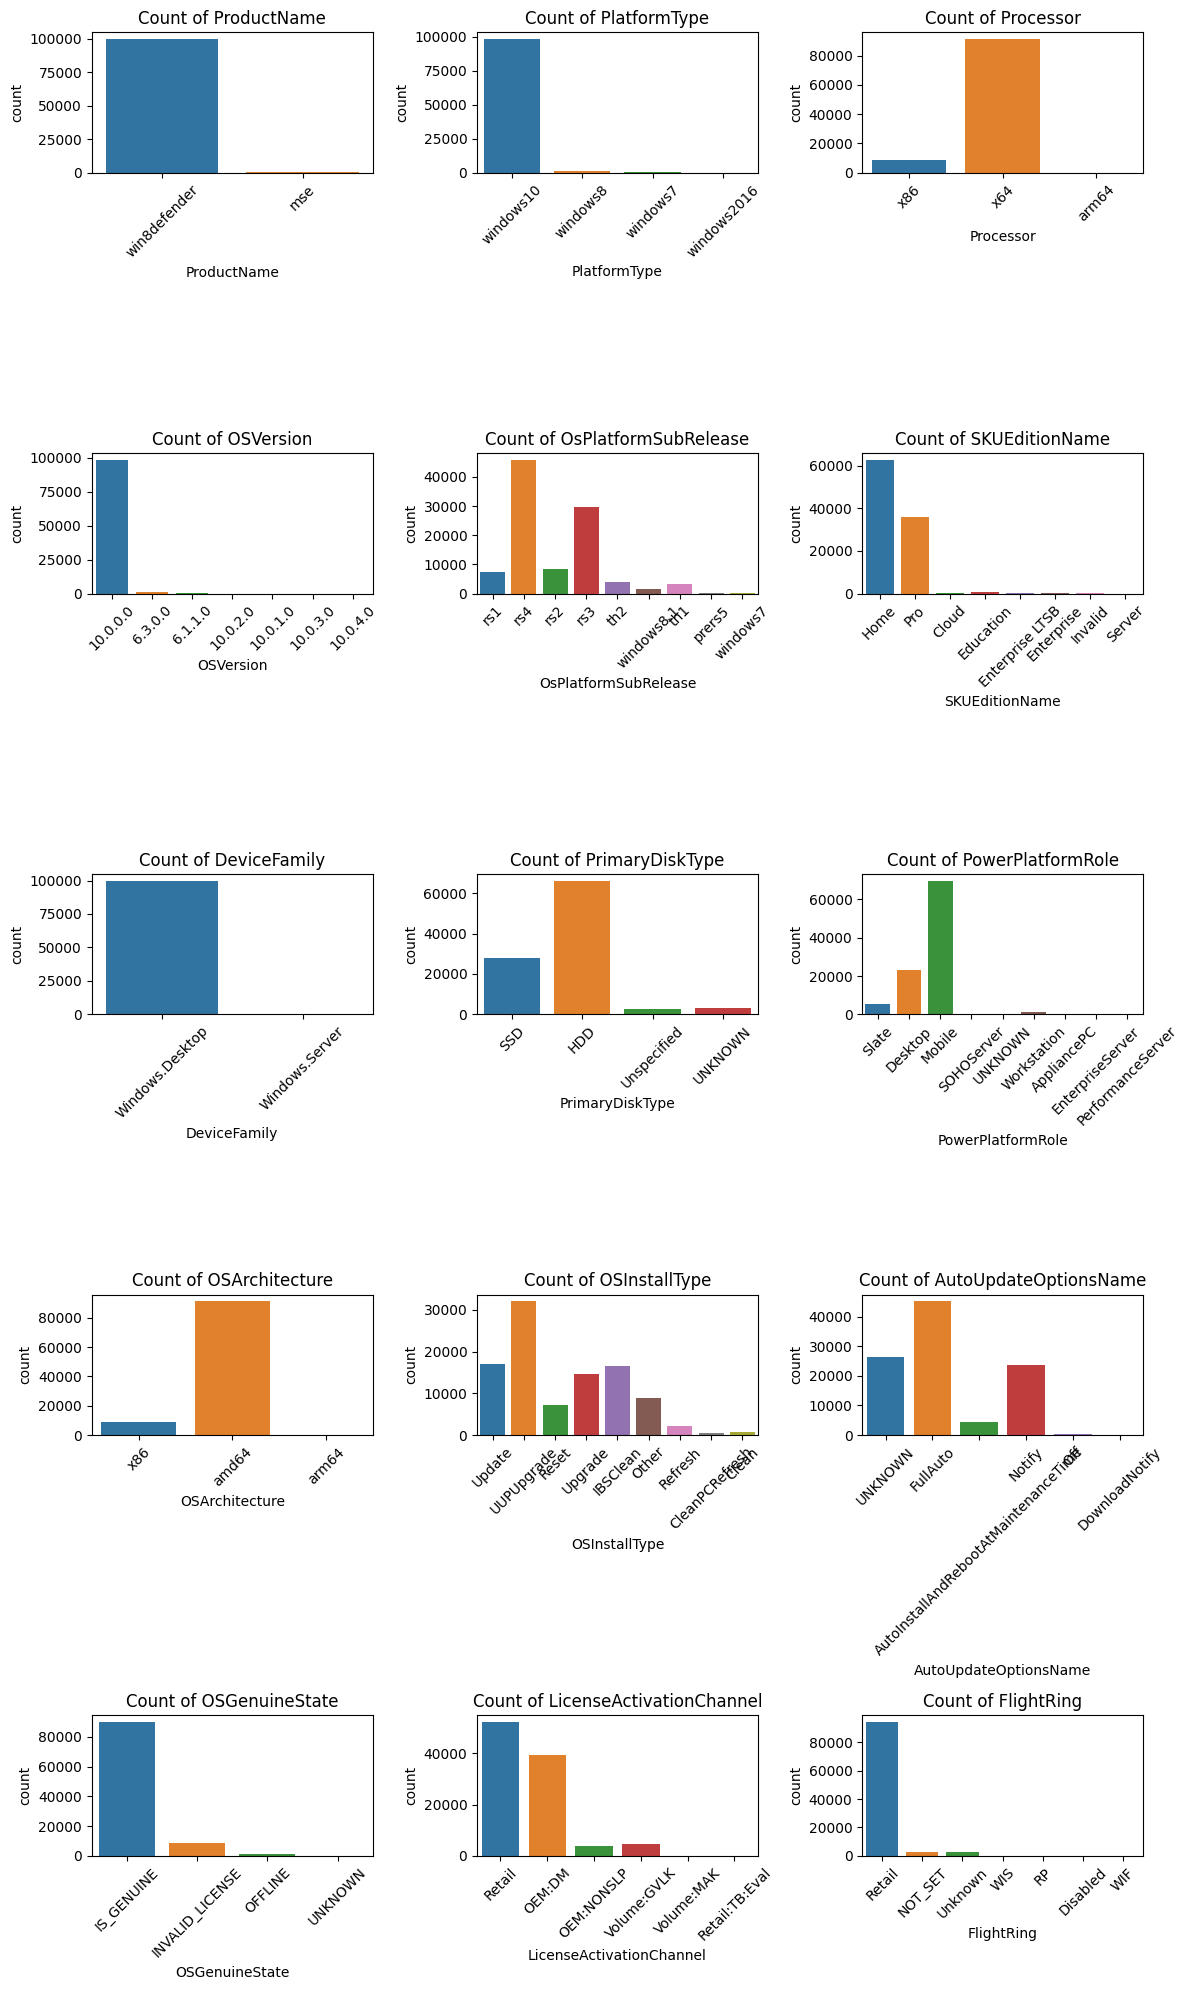

In [29]:
display(Markdown("**Univariate analysis on Categorical Features**"))

# Determine number of rows and columns dynamically
num_features = len(selected_categorical_features)
cols = 3  # Set a fixed number of columns
rows = math.ceil(num_features / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each categorical feature
for i, col in enumerate(selected_categorical_features):
    sns.countplot(data=train_data, x=col, ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Here are the insights for each graph:

### **Key insights from the Graphs**
1. **ProductName** - Highly imbalanced. "windefender" dominates, while "mse" has negligible representation.
2. **PlatformType** - "windows10" is overwhelmingly dominant, with other versions having very low counts.
3. **Processor** - "x64" has a significantly higher count than "x86" and "arm64."
4. **OSVersion** - A single version (likely "10.0.0.9") is dominant, indicating low variety in OS versions.
5. **OsPlatformSubRelease** - "rs4," and "rs3" are most common, but distribution is more spread out than other features.
6. **SKUEditionName** - "Home" and "Pro" editions dominate, while others have significantly lower counts.
7. **DeviceFamily** - Almost entirely "Windows.Desktop," meaning server devices are rare.
8. **PrimaryDiskType** - "SSD" and "HDD" are dominant, with SSD leading slightly. Some "UNKNOWN" values exist.
9. **PowerPlatformRole** - "Mobile" and "Desktop" are most common, while others have much lower representation.
10. **OSArchitecture** - "amd64" is dominant, with very few "x86" or "arm64" systems.
11. **OSInstallType** - Distribution is more balanced than others, but "UUPUpgrade","Update," "Upgrade," and "Reset" are common.
12. **AutoUpdateOptionsName** - "FullAuto" is the largest category, followed by "UNKNOWN" and "Notify."
13. **OSGenuineState** - "IS_GENUINE" is dominant, meaning most systems have a valid license.
14. **LicenseActivationChannel** - "Retail" leads, followed by "OEM:DM." Other activation methods have minimal representation.
15. **FlightRing** - "Retail" is highly dominant, with other categories barely appearing.

### **Key Takeaways**
- **Many features are highly imbalanced** (e.g., "ProductName," "PlatformType," "Processor").
- **A few features have more balanced distributions**, like "OsPlatformSubRelease" and "OSInstallType."
- **Some unknown categories are present** (e.g., "UNKNOWN" in AutoUpdateOptionsName and PrimaryDiskType).

It is observed that few features have values as Unknown or UNKNOWN

In [30]:
columns_with_unknown = train_data.columns[train_data.apply(lambda col: col.astype(str).str.contains("UNKNOWN", case=False, na=False)).any()]
print("Columns containing 'UNKNOWN' or 'Unknown':")
print(columns_with_unknown.tolist())

Columns containing 'UNKNOWN' or 'Unknown':
['PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'AutoUpdateOptionsName', 'OSGenuineState', 'FlightRing']


In [31]:
train_data.eq('UNKNOWN').sum().sort_values(ascending=False).head(5)

AutoUpdateOptionsName    26299
PrimaryDiskType           3105
ChassisType                454
OSGenuineState             115
PowerPlatformRole          106
dtype: int64

* From the above univariate analysis for categorical features, it has been noted that only the feature `AutoUpdateOptionsName` have a higher count of 'unknown' values. 
* The features with no of values = unknown less than 2 percentage will have that value replaced with null

In [32]:
def chasisifunknown(train_data):
    train_data['ChassisType'].replace('UNKNOWN','Unknown',inplace=True)
    return train_data
def convert_unknown(train_data):
    train_data['ChassisType'].replace('Unknown',np.nan,inplace=True)
    train_data['OSGenuineState'].replace('UNKNOWN',np.nan,inplace=True)
    train_data['PowerPlatformRole'].replace('UNKNOWN',np.nan,inplace=True)
    return train_data

### Bivariate analysis on categorical features

**Bivariate analysis on Categorical Features**

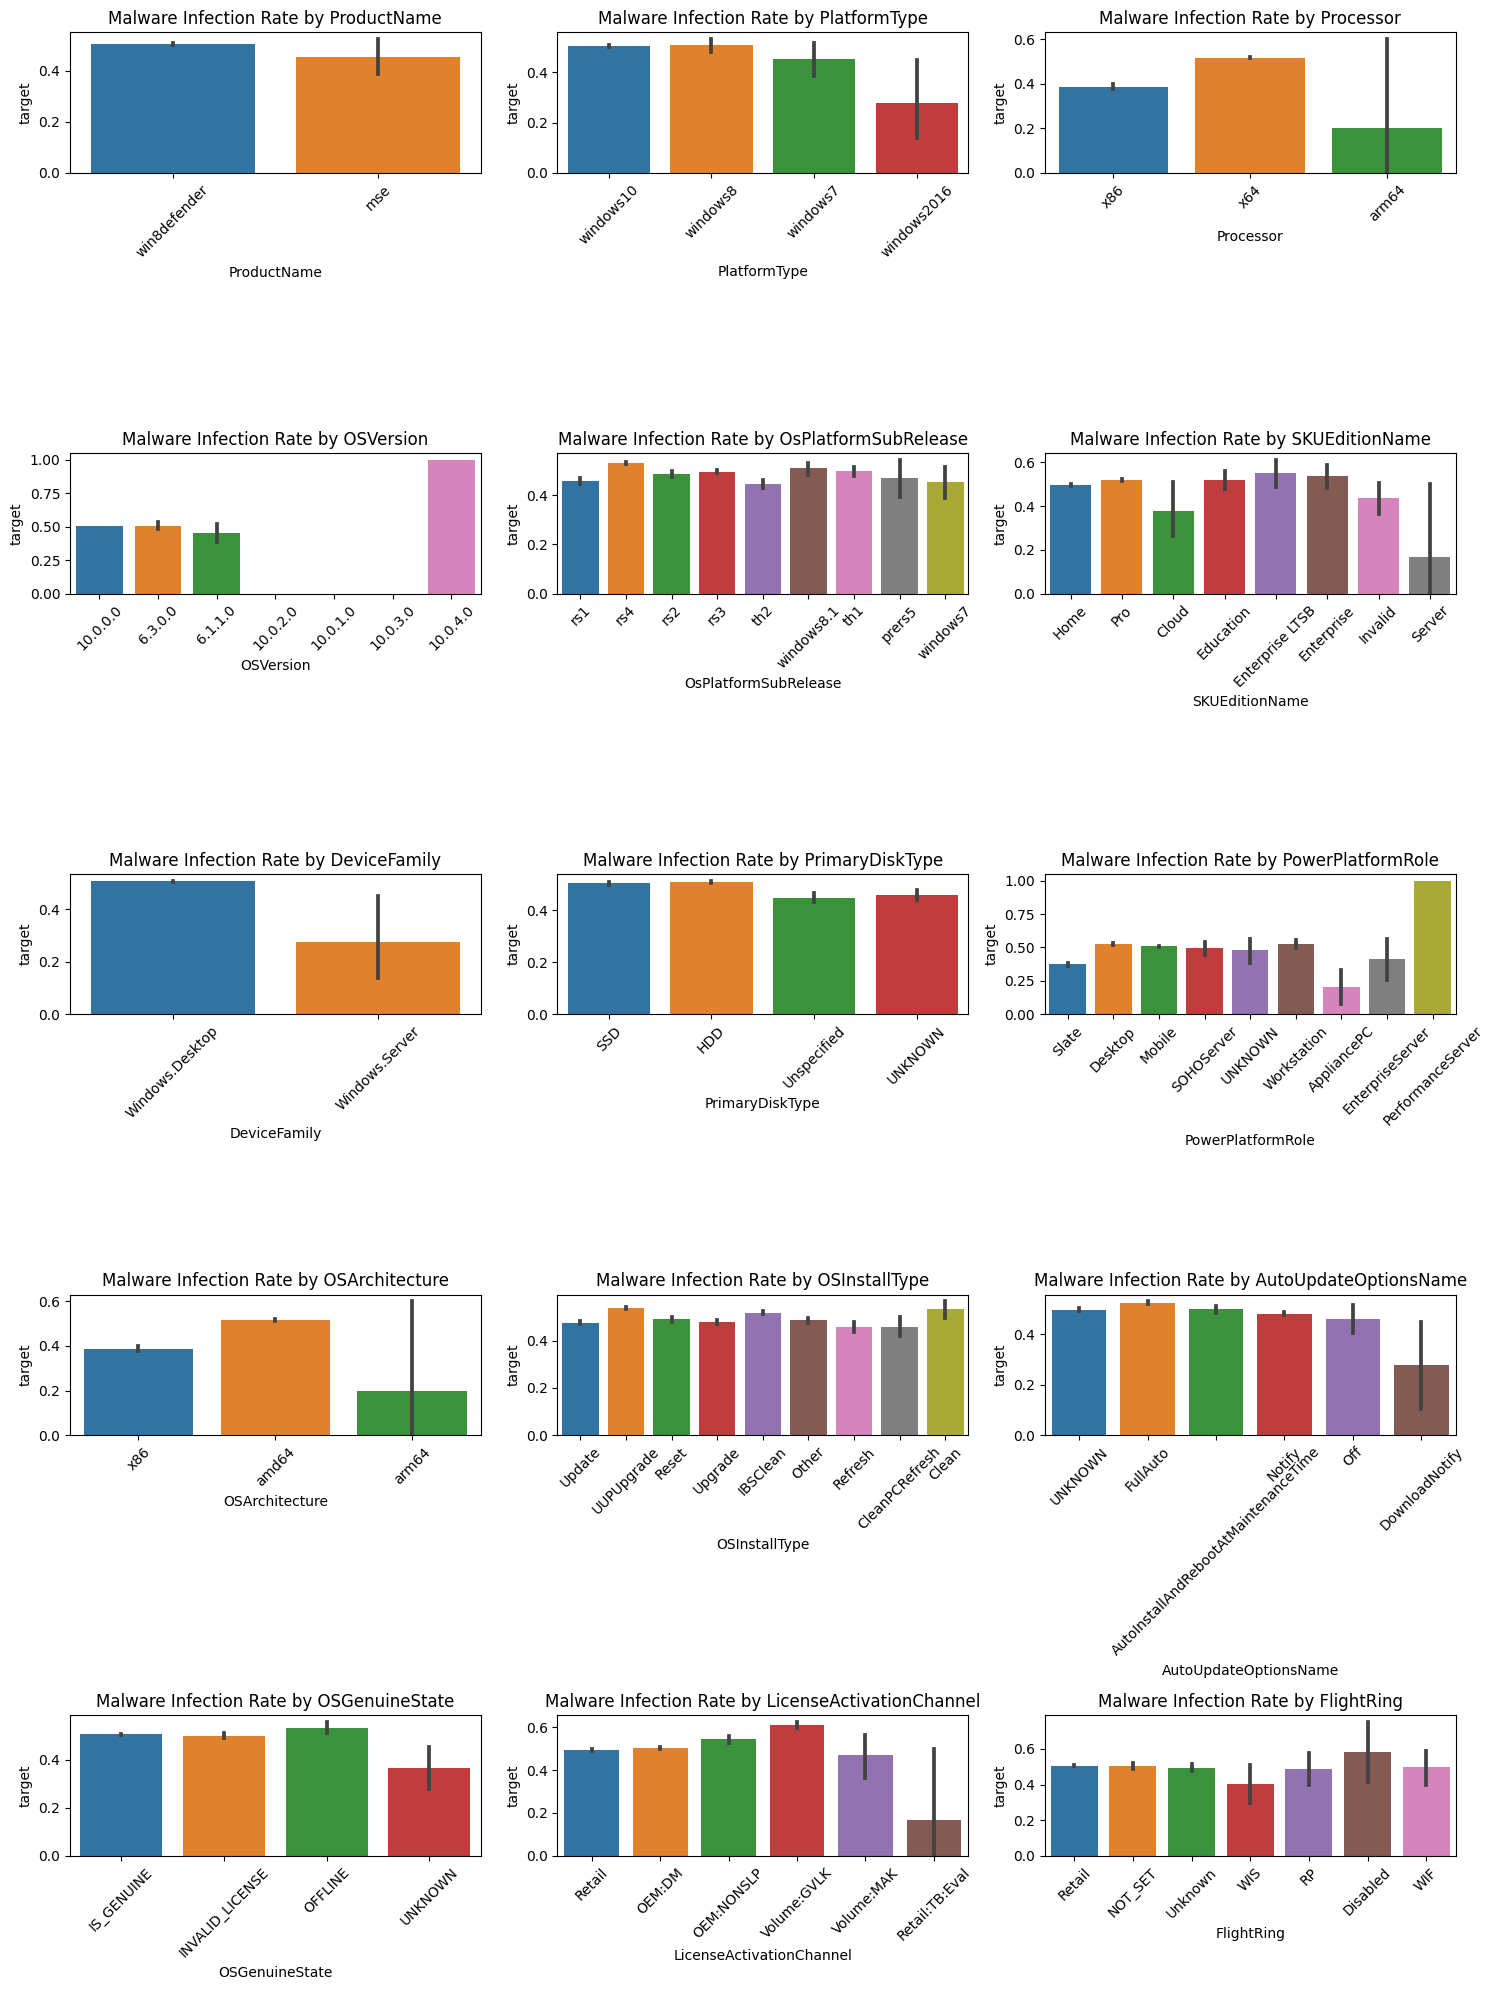

In [33]:
#On average, how often does malware infect systems with this particular category
display(Markdown("**Bivariate analysis on Categorical Features**"))

# Determine number of rows and columns dynamically
num_features = len(selected_categorical_features)
cols = 3  # Set a fixed number of columns
rows = math.ceil(num_features / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each categorical feature against the target
for i, col in enumerate(selected_categorical_features):
    sns.barplot(x=train_data[col], y=train_data["target"], ax=axes[i])
    axes[i].set_title(f"Malware Infection Rate by {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots (if any)
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Insights from the Graphs:
These graphs show how different categorical features correlate with malware infection rates.

- **ProductName:** *Windows Defender* has a higher malware infection rate compared to  *mse*. 
- **PlatformType:** *Windows 8 and 10 * are the most common, while other versions (*Windows  7, 2016*) are rare.
- **Processor:** Majority of systems have *x64*, with fewer *x86* and very few *arm64*.
- **OSVersion:** One version (*10.0.4.0*) dominates. Other versions are rare, indicating imbalance.
- **OsPlatformSubRelease:** They have a fairly distributed correlation with the target
- **SKUEditionName:** They have a fairly distributed correlation with the target
- **DeviceFamily:** Almost all are *Windows Desktop*, with very few *Windows Server*.
- **PrimaryDiskType:** *HDD* and *SSD* are most common, with some *unknown/unspecified* values.
- **PowerPlatformRole:** *PerformanceServer* is dominant, while others  have smaller shares.
- **OSArchitecture:** *amd64* is dominant, *x86* is much smaller, and *arm64* is very rare.
- **OSInstallType:** They have a fairly distributed correlation with the target
- **AutoUpdateOptionsName:** They are fairly distributed and *UNKNOWN* is most frequent.
- **OSGenuineState:** They have a fairly distributed correlation with the target
- **LicenseActivationChannel:** *Volume:GVLK* is most common, followed by *OEM-NONSLP*.
- **FlightRing:** *RP, Disabled* show higher malware infection rates.

#### **Key Observations:**

- Many categorical features are highly **imbalanced** (e.g., *ProductName, OSVersion, DeviceFamily*).
- Some features have unknown or unspecified values (*PrimaryDiskType, AutoUpdateOptionsName*), which might need handling.
- **Malware is more frequent on:**  
  - *x86* processors.  
  - *Older OS versions (10.0.3.0, 10.0.4.0).*  
  - *PerformanceServer*  
  - *Non-genuine Windows licenses.*  
  - *Certain SKU editions (Pro, Enterprise, Education).*  


## Highly skewed features

Highly Skewed Features with Skewness Values and Correlation with Target:
Feature                       Skewness       Correlation with Target
EnableLUA                     164.0660       -0.0019
SMode                         44.4684        -0.0156
IsPortableOS                  43.8193        0.0068
HasTpm                        17.5377        0.0077
IsVirtualDevice               16.0429        -0.0398
TotalPhysicalRAMMB            7.9191         0.0657
IsPassiveModeEnabled          7.3330         -0.0420
FirewallEnabled               6.8695         0.0103
RealTimeProtectionState       6.5296         0.0490
NumAntivirusProductsEnabled   5.5489         -0.0415
PrimaryDisplayDiagonalInches  5.3478         0.0351
OSBuildRevisionOnly           5.1812         -0.0081
IsPenCapable                  4.6568         -0.0198
IsSystemProtected             4.4081         0.0624
IsAlwaysOnAlwaysConnectedCapable3.7665         -0.0648
ProcessorCoreCount            3.4375         0.0568
IEVersionID     

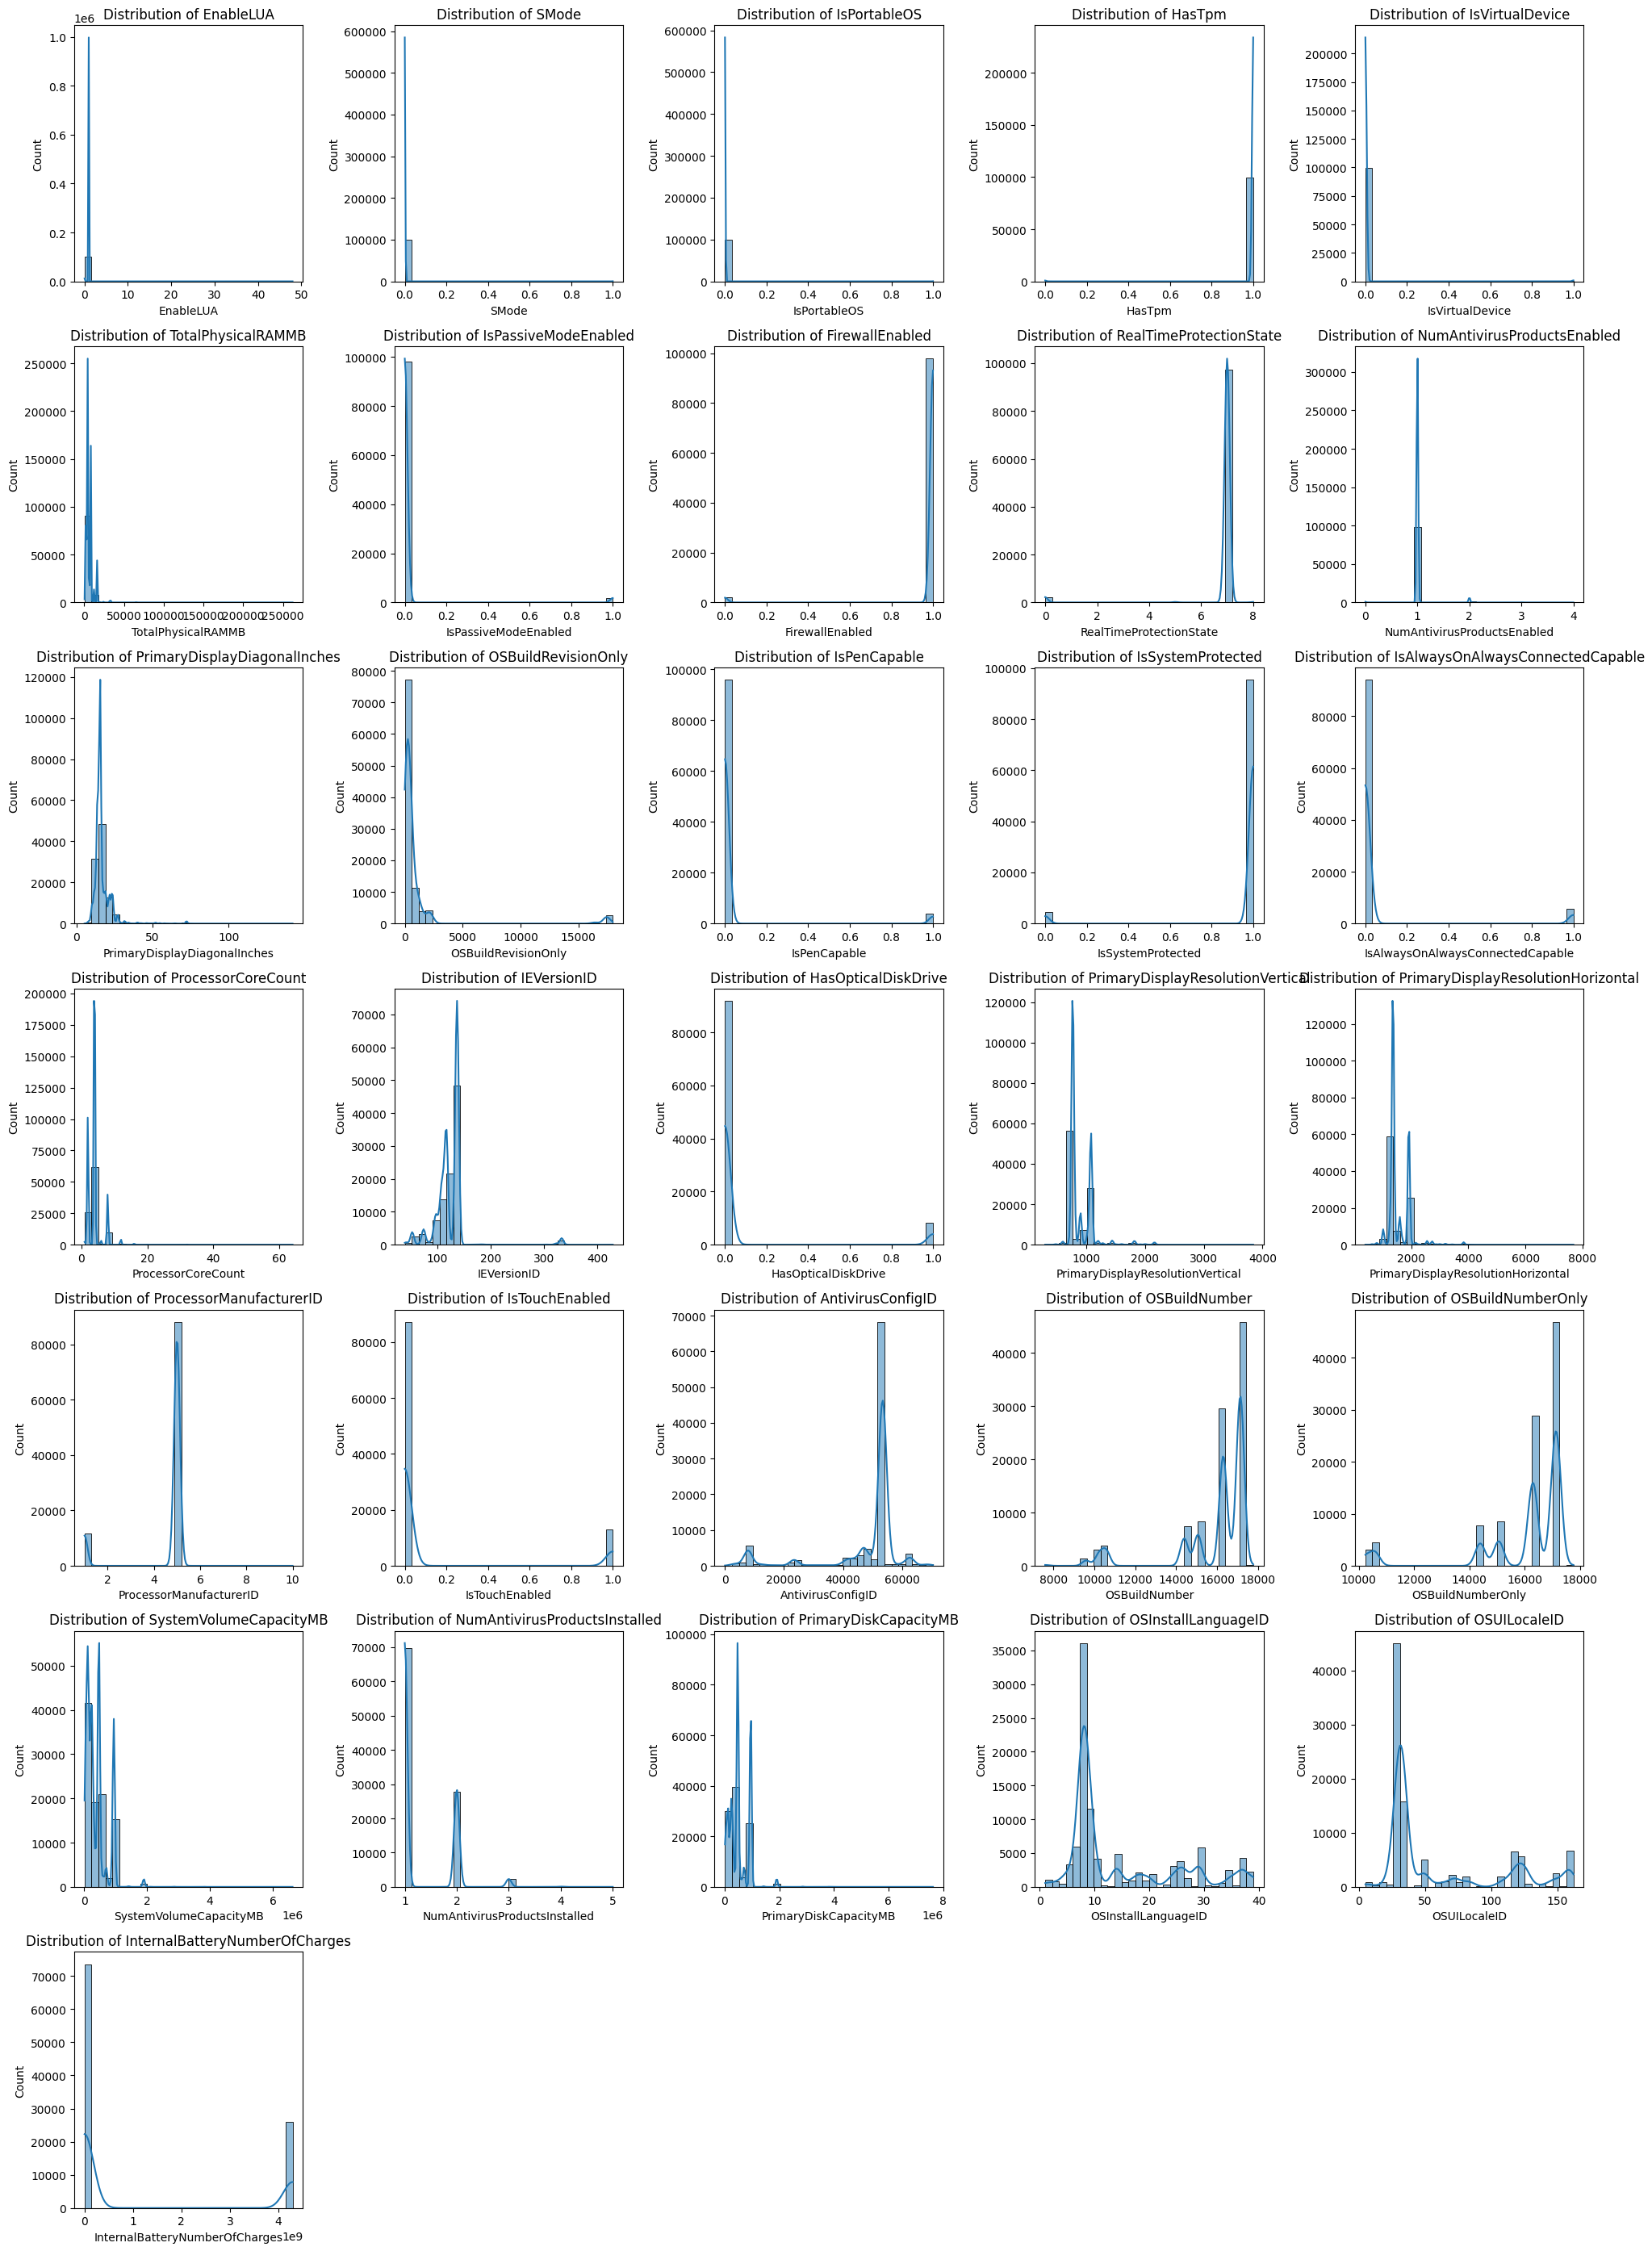

In [34]:

skewness = numerical_features.skew().abs().sort_values(ascending=False)

highly_skewed_features = skewness[skewness > 1].index.tolist()

correlations = train_data[highly_skewed_features + ['target']].corr()['target'].drop('target')

print("Highly Skewed Features with Skewness Values and Correlation with Target:")
print(f"{'Feature':<30}{'Skewness':<15}{'Correlation with Target'}")
print("=" * 65)
for col in highly_skewed_features:
    print(f"{col:<30}{skewness[col]:<15.4f}{correlations[col]:.4f}")


plots_per_row = 5
num_features = len(highly_skewed_features)
num_rows = (num_features // plots_per_row) + (num_features % plots_per_row > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(plots_per_row * 4, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(highly_skewed_features):
    sns.histplot(numerical_features[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



### Ways to handle the highly skewed features:
#### 1. Applied Log Transformation to Continuous, Skewed, Positive Features  
   - Chosen Features: `"NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", "ProcessorCoreCount", "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "TotalPhysicalRAMMB",   "PrimaryDisplayDiagonalInches", "PrimaryDisplayResolutionHorizontal", "PrimaryDisplayResolutionVertical", "InternalBatteryNumberOfCharges", "OSBuildRevisionOnly"`  
   - These are **continuous numerical** features with high skewness and strictly **positive values**, making them ideal for log transformation.  

#### 2. Excluded Binary (0/1) Features as Log Transformation is Meaningless  
   - Excluded Features:  `"EnableLUA", "SMode", "IsPortableOS", "HasTpm", "IsVirtualDevice", "IsPassiveModeEnabled", "FirewallEnabled", "RealTimeProtectionState", "IsPenCapable", "IsSystemProtected", "IsAlwaysOnAlwaysConnectedCapable", "IsTouchEnabled"`  
   - These are **binary (categorical)** and don’t benefit from log transformation, as it won't change their distribution.  

#### 3. Excluded ID-Like and Categorical Features That Log Transformation Won’t Help 
   - Excluded Features:  `"ProcessorManufacturerID", "OSInstallLanguageID", "OSUILocaleID", "AntivirusConfigID", "IEVersionID"`  
   - These are **categorical/ID-based values** rather than continuous numbers, so transforming them wouldn’t provide any statistical benefit.  

#### 4. Features with Low Skewness or Insignificant Impact on Model Performance 
   - Excluded Features:  `"OSBuildNumber", "OSBuildNumberOnly"`  
   - Although slightly skewed, their distributions are not extreme enough to require transformation, and their **impact on model performance is low.**  

#### 5. Considered Features’ Correlation with Target for Practical Impact
   - Applied Log Transformation to: Features with some correlation like `"TotalPhysicalRAMMB"` (0.0931), `"AntivirusConfigID"` (0.1153), and `"NumAntivirusProductsInstalled"` (-0.1524) to make distributions more normal.  
   - Excluded Uncorrelated Features: Some highly skewed features like `"EnableLUA"` (-0.0010) had **near-zero correlation**, so transforming them wouldn’t help much in prediction.

#### CONCLUSION
* For logarithmic transformation only the features which are continuos numerical and positive were selected.
* Features which are binary ( 0 or 1), ID based,slightly skewed but dont have extreme values and nearly zero correlation have been excluded



# **FEATURE ENGINEERING**

Log transformation is applied only to continuous, skewed, and positive features to normalize distributions and improve model performance, while binary, categorical, and low-impact features were excluded. The selection was guided by correlation with the target, ensuring only meaningful transformations were applied.

In [35]:
# ADD LOG TRANSFORMATION
log_transform_features = [
    "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", 
    "ProcessorCoreCount", "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", 
    "TotalPhysicalRAMMB", "PrimaryDisplayDiagonalInches", 
    "PrimaryDisplayResolutionHorizontal", "PrimaryDisplayResolutionVertical", 
    "InternalBatteryNumberOfCharges", "OSBuildRevisionOnly"
]
import numpy as np
train_data[log_transform_features] = np.log1p(train_data[log_transform_features])
test_data[log_transform_features] = np.log1p(test_data[log_transform_features])
print("log transformation done")

log transformation done


Additional features were created from `DateOS` and `DateAS` to enhance model relevance and training effectiveness.

In [36]:
def handling_dates(train_data, test_data):
    # Convert to datetime format in pandas
    train_data["DateAS"] = pd.to_datetime(train_data["DateAS"], errors="coerce")
    train_data["DateOS"] = pd.to_datetime(train_data["DateOS"], errors="coerce")
    test_data["DateAS"] = pd.to_datetime(test_data["DateAS"], errors="coerce")
    test_data["DateOS"] = pd.to_datetime(test_data["DateOS"], errors="coerce")
    
    # Converting to ordinal type for correlation check
    train_data["DateAS_Ordinal"] = train_data["DateAS"].map(lambda x: x.toordinal() if pd.notna(x) else np.nan)
    train_data["DateOS_Ordinal"] = train_data["DateOS"].map(lambda x: x.toordinal() if pd.notna(x) else np.nan)
    test_data["DateAS_Ordinal"] = test_data["DateAS"].map(lambda x: x.toordinal() if pd.notna(x) else np.nan)
    test_data["DateOS_Ordinal"] = test_data["DateOS"].map(lambda x: x.toordinal() if pd.notna(x) else np.nan)
    
    correlation = train_data["DateAS_Ordinal"].corr(train_data["DateOS_Ordinal"])
    print(f"Correlation between DateAS and DateOS: {correlation:.4f}")
    print("Correlation of DateAS and DateOS with the target")
    print(train_data[["DateAS_Ordinal", "DateOS_Ordinal"]].corrwith(train_data["target"]))
    
    for col in ["DateAS", "DateOS"]:
        train_data[f"Year{col[-2:]}"] = train_data[col].dt.year
        train_data[f"Month{col[-2:]}"] = train_data[col].dt.month
        test_data[f"Year{col[-2:]}"] = test_data[col].dt.year
        test_data[f"Month{col[-2:]}"] = test_data[col].dt.month
    
    # Create new features
    train_data["DaysSinceOSUpdate"] = (train_data["DateAS"] - train_data["DateOS"]).dt.days
    test_data["DaysSinceOSUpdate"] = (test_data["DateAS"] - test_data["DateOS"]).dt.days
    
    train_data["MonthsSinceOSUpdate"] = (train_data["YearAS"] - train_data["YearOS"]) * 12 + (train_data["MonthAS"] - train_data["MonthOS"])
    test_data["MonthsSinceOSUpdate"] = (test_data["YearAS"] - test_data["YearOS"]) * 12 + (test_data["MonthAS"] - test_data["MonthOS"]) 
    
    # ActivatedSoon feature
    train_data["ActivatedSoon"] = (train_data["DaysSinceOSUpdate"] < 30).astype(int)
    test_data["ActivatedSoon"] = (test_data["DaysSinceOSUpdate"] < 30).astype(int)
    
    # Handle negative values (if DateOS > DateAS)
    train_data.loc[train_data["MonthsSinceOSUpdate"] < 0, "MonthsSinceOSUpdate"] = None
    train_data.loc[train_data["DaysSinceOSUpdate"] < 0, "DaysSinceOSUpdate"] = None
    test_data.loc[test_data["MonthsSinceOSUpdate"] < 0, "MonthsSinceOSUpdate"] = None
    test_data.loc[test_data["DaysSinceOSUpdate"] < 0, "DaysSinceOSUpdate"] = None
    
    # Check correlation of new features with target
    print(train_data[["YearAS", "MonthAS", "YearOS", "MonthOS", "MonthsSinceOSUpdate", "DaysSinceOSUpdate", "ActivatedSoon"]].corrwith(train_data["target"]))
    
    return train_data, test_data

# train_data, test_data = handling_dates(train_data, test_data)


1. **Weak correlation (0.1581) between DateAS (malware signature update) and DateOS (OS update)** suggests they are somewhat related but not strongly dependent.  
2. **DateAS (0.0495) has a slightly stronger correlation with malware detection than DateOS (0.0389),** indicating that keeping malware definitions updated is more relevant than OS updates.  
3. **Longer gaps since the last OS update (negative correlation ~ -0.037) slightly increase malware risk,** implying outdated systems may be more vulnerable.  
4. **ActivatedSoon (0.0348) suggests that newly activated systems are slightly more prone to malware infections,** possibly due to initial weak security configurations.  
5. **Feature engineering should consider time-based trends,** such as “Time Since Last Malware Signature Update” and “Time Since Last OS Update,” for better predictive power.

In [37]:
def dates_graph(train_data):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Increased to (2,4) to fit all graphs properly  

    plot_data = [("MonthAS", "Malware Infection Rate by Activation Month", "Month of Activation"), 
                 ("MonthOS", "Malware Infection Rate by OS Installation", "Month of OS Installation"),
                 ("YearAS", "Malware Infection Rate by Activation Year", "Year of Activation"), 
                 ("YearOS", "Malware Infection Rate by OS Installation Year", "Year of OS Installation"), 
                 ("ActivatedSoon", "Malware Infection Rate by ActivatedSoon (30 days within OS installation)", "Activated Within 30 Days")]

    for ax, (x, title, xlabel) in zip(axes.flat[:5], plot_data):  # Ensure all 5 categorical plots are assigned
        sns.barplot(x=train_data[x], y=train_data["target"], ax=ax)  
        ax.set_title(title)  
        ax.set_xlabel(xlabel)  
        ax.set_ylabel("Infection Probability")  

    ax_hist_months = axes[1, 1]  
    sns.histplot(train_data[train_data["target"] == 1]["MonthsSinceOSUpdate"], bins=30, color="red", label="Infected", kde=True, ax=ax_hist_months)
    sns.histplot(train_data[train_data["target"] == 0]["MonthsSinceOSUpdate"], bins=30, color="blue", label="Not Infected", kde=True, ax=ax_hist_months)
    ax_hist_months.set_title("Distribution of Months Since Last OS Update")
    ax_hist_months.set_xlabel("Months Since Last OS Update")
    ax_hist_months.legend()

    ax_hist_days = axes[1, 2]  
    sns.histplot(train_data[train_data["target"] == 1]["DaysSinceOSUpdate"], bins=30, color="red", label="Infected", kde=True, ax=ax_hist_days)
    sns.histplot(train_data[train_data["target"] == 0]["DaysSinceOSUpdate"], bins=30, color="blue", label="Not Infected", kde=True, ax=ax_hist_days)
    ax_hist_days.set_title("Distribution of Days Since Last OS Update")
    ax_hist_days.set_xlabel("Days Since Last OS Update")
    ax_hist_days.legend()

    # Hide unused subplots
    for row in axes:
        for ax in row:
            if not ax.has_data():  # Check if the subplot is empty
                fig.delaxes(ax)

    plt.tight_layout()
    plt.show()
    
# dates_graph(train_data)


1. **Malware Infection Rate by Activation Month:** Systems activated in mid-year months (July-September) show a higher malware infection probability.  
2. **Malware Infection Rate by OS Installation Month:** Infection rates remain fairly consistent across different OS installation months.  
3. **Malware Infection Rate by Activation Year:** Newer systems (2018) have a higher probability of malware infection compared to older ones.  
4. **Malware Infection Rate by OS Installation Year:** Infection probability is high across all OS installation years, with a slight increase in 2018.  
5. **Malware Infection Rate by ActivatedSoon (30 days within OS installation):** Systems activated soon after OS installation are more likely to get infected.  
6. **Distribution of Months Since Last OS Update:** Most infected systems had their last OS update within the past five months, but risk persists over time.  
7. **Distribution of Days Since Last OS Update:** Infection probability is highest shortly after an OS update, with a long-tail distribution indicating some infections even after extended periods without updates.



These additional features from Dates are not added in the current best model as the final accuracy went down to 63.55 %

### Feature dropping analysis

**A new list `to_drop_features` was created to store columns identified for removal after the exploratory data analysis (EDA).**

The reason why each set of features were dropped are :
* Features with low variance which had only one unique value, provides no useful information
* Features with high variance with too many unique values (>= 1200), may act like an ID and not generalize well
* Features like `'IsPassiveModeEnabled', 'OSBuildNumberOnly', 'OSInstallLanguageID'` were dropped because they had High correlation with other features (redundant information) and Low variance (not useful for distinguishing different cases).
* `'DateOS'` and `'DateAS'` were removed because new features (`YearAS, MonthAS, YearOS, MonthOS`) were created, making them unnecessary.
*  The 5 least correlated features with the target were dropped, as they provide minimal predictive power.
*  Columns with `"ID"` in their name were dropped to avoid misleading the model, as IDs are unique to each sample and don’t help with predictions.  

This selection keeps only meaningful, relevant, and non-redundant features for better model performance. 

In [38]:
# Initialize the list of features to drop
to_drop_features = []

# After checking unique values in each column drop the ones with very high and low cardinality
low_variance_cols = [col for col in train_data.columns if train_data[col].nunique() <= 1]
high_variance_cols = [col for col in train_data.columns if train_data[col].nunique() >= 12000]
print(f"Low-variance features: {low_variance_cols}")
print(f"High-variance features: {high_variance_cols}")

 #Columns with low variance, where only a single unique value is present throughout the dataset, will be dropped.

to_drop_features.extend(low_variance_cols)
to_drop_features.extend(high_variance_cols)

# #'IsPassiveModeEnabled', 'OSBuildNumberOnly', 'OSInstallLanguageID' will be dropped as they have high correlation(feature dependence) and low variance 
high_corr_cols=['IsPassiveModeEnabled', 'OSBuildNumber', 'OSUILocaleID']
to_drop_features.extend(high_corr_cols)

#Since we have created more relevant features like YearAS,MonthAS,YearOS,MonthOS  we can drop the dateos and dateas columns
to_drop_features.extend(['DateOS','DateAS'])

# Compute absolute correlation with the target
correlation_with_target = numerical_features.corr()["target"].abs().sort_values()
print(correlation_with_target.head(5))

# # Get the 5 features with the lowest correlation as a list
lowest_correlation_features = correlation_with_target.head(5).index.tolist()
print("Features with lowest correlation",lowest_correlation_features)

# # Extend the to_drop_features list
to_drop_features.extend(lowest_correlation_features)

#ID-like categorical features (e.g., user ID, serial numbers) → These may mislead the model.
id_features = [col for col in train_data.columns if 'ID' in col and col not in to_drop_features]
to_drop_features.extend(id_features)
print(f"Features to drop ({len(to_drop_features)}): {to_drop_features }")

Low-variance features: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
High-variance features: ['MachineID', 'CityID', 'OEMModelID', 'SystemVolumeCapacityMB', 'FirmwareVersionID']
OEMModelID             0.001016
EnableLUA              0.001928
OSUILocaleID           0.001936
IsSecureBootEnabled    0.002091
GeoRegionID            0.002802
Name: target, dtype: float64
Features with lowest correlation ['OEMModelID', 'EnableLUA', 'OSUILocaleID', 'IsSecureBootEnabled', 'GeoRegionID']
Features to drop (27): ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID', 'CityID', 'OEMModelID', 'SystemVolumeCapacityMB', 'FirmwareVersionID', 'IsPassiveModeEnabled', 'OSBuildNumber', 'OSUILocaleID', 'DateOS', 'DateAS', 'OEMModelID', 'EnableLUA', 'OSUILocaleID', 'IsSecureBootEnabled', 'GeoRegionID', 'AntivirusConfigID', 'CountryID', 'LocaleEnglishNameID', 'IEVersionID', 'OEMNameID', 'ProcessorManufacturerID', 'ProcessorModelID', 'OSInstallLanguageID', 'FirmwareM

The above approach led to a decrease in accuracy, so it was refined to only drop low-variance columns with a single unique value and the unique identifier of the dataset - `MachineID`.

In [39]:
final_drop_features=['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled','MachineID']
train_data.drop(columns=final_drop_features, inplace=True)
test_data.drop(columns=final_drop_features, inplace=True)
print(len(final_drop_features),final_drop_features)

4 ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID']


In [40]:
train_data.shape,test_data.shape

((100000, 72), (10000, 71))

# **DATA PREPROCESSING**

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Separate numerical and categorical columns COMMENT THIS IF LOG TRANS SHUD BE DONE AFTER NUMCOLS
numerical_cols = train_data.select_dtypes(include=[np.number]).drop(columns=['target']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Define features and target
X = train_data.drop(columns=['target'])
y = train_data['target']


#DATA PREPROCESSING
# Create the transformer for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[  
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[  
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorical_cols)
    ]
)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# preprocessor.fit(X_train, y_train)
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
test_scaled = preprocessor.transform(test_data)  
print('preprocessing done')

preprocessing done


* SimpleImputer is used to handle missing values in a dataset. When you set strategy="most_frequent", it replaces missing values with the most frequent (mode) value in each categorical column. Meanwhile when the strategy="mean", it replaces missing values with the mean value in each numerical column
* If ordering is not explicitly specified, the encoding may be arbitrary, making it no different from label encoding. Hence it assigns arbitrary integer values to categories without considering any inherent order( the parameters allows encoding unseen categories instead of raising an error, and assigns them the value `-1` to handle unknown inputs safely)
* MinMaxScaler is used to to keep the original distribution but scale values between a fixed range

In [42]:
X_train.shape,X_train_scaled.shape

((90000, 71), (90000, 71))

# **MODEL BUILDING**

## **Model 1 : XGBoost Classifier** 

Optimized for speed and accuracy, handles missing values, and prevents overfitting with regularization.  

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# fixed random state for reproducibility, prevents warnings related to label encoding, 'logloss' for binary classification
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print("\nXGBoost Classifier Accuracy:", accuracy)
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)
print("\nXGBoost Classification Report:\n", classification_report(y_val, y_val_pred))



XGBoost Classifier Accuracy: 0.627
Confusion Matrix:
 [[2919 2029]
 [1701 3351]]

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      4948
           1       0.62      0.66      0.64      5052

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



### Feature selection

 Features to drop (14): ['ProcessorManufacturerID', 'PrimaryDisplayResolutionHorizontal', 'OSBuildNumber', 'OSSkuFriendlyName', 'OSVersion', 'OsPlatformSubRelease', 'NumericOSVersion', 'HasTpm', 'OSUILocaleID', 'OSEdition', 'PrimaryDiskCapacityMB', 'DateAS', 'Processor', 'EngineVersion']
Selected Features (30): ['ProductName', 'AppVersion', 'SignatureVersion', 'RealTimeProtectionState', 'CityID', 'GeoRegionID', 'IsSystemProtected', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'MDC2FormFactor', 'DeviceFamily', 'ProcessorModelID', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayResolutionVertical', 'OSArchitecture', 'OSBranch', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallType', 'FlightRing', 'FirmwareManufacturerID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsGamer', 'RegionIdentifier', 'DateOS']

XGBoost Classifier Accuracy (Selected Features): 0.6006

XGBoost Classification Report (Selected Features):
               precision  

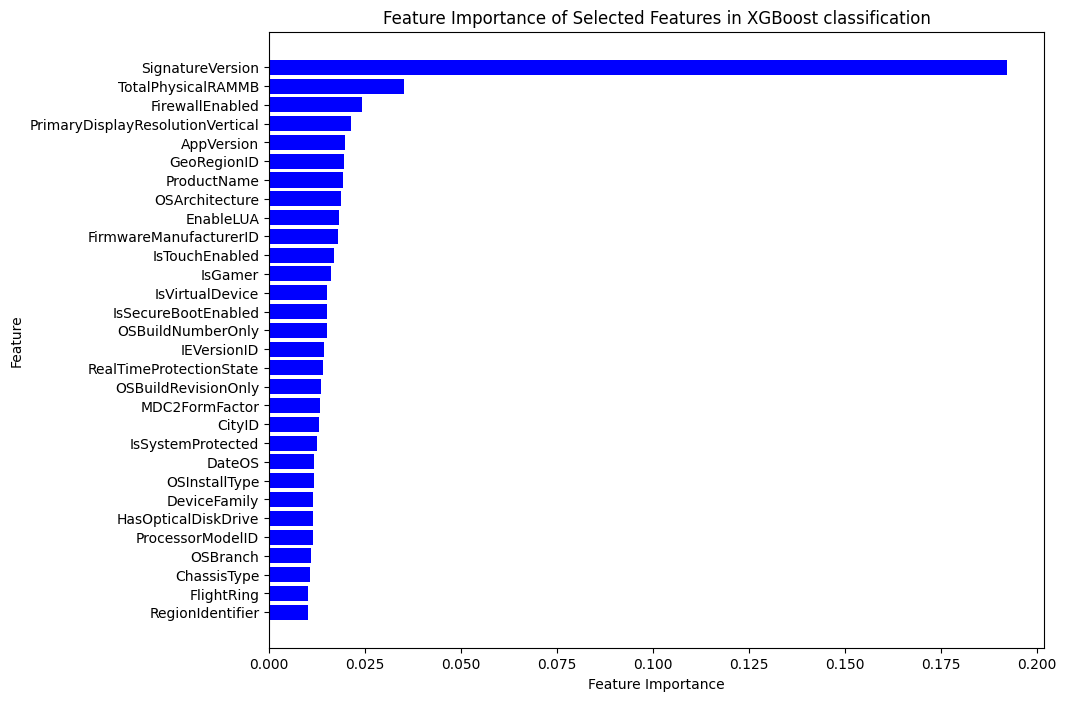

In [44]:
# Convert NumPy arrays back to DataFrame for feature selection and correlation analysis
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numerical_cols + categorical_cols)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols + categorical_cols)
test_scaled=pd.DataFrame(test_scaled, columns=numerical_cols + categorical_cols)

# Get feature importances from the best XGBoost model
importances = model.feature_importances_

# Compute correlation matrix of features
cor = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()

# Identify highly correlated features (correlation > 0.8 but < 1 to avoid self-correlation)
cor_pairs = cor.unstack().sort_values(ascending=False)
cor_pairs = cor_pairs[(cor_pairs > 0.8) & (cor_pairs < 1)]
cor_pairs = cor_pairs.drop_duplicates()

# Store feature importance in a dictionary
feature_importance_dict = dict(zip(X_train.columns, importances))

# Identify less important features among highly correlated pairs(to avoid multicollinearity)
features_to_drop = []
for feature_1, feature_2 in cor_pairs.index:
    if feature_importance_dict[feature_1] < feature_importance_dict[feature_2]:
        features_to_drop.append(feature_1)
    else:
        features_to_drop.append(feature_2)

# Remove duplicates in the features to drop list
features_to_drop = list(set(features_to_drop))

# Select important features (importance > 0.01) and not in features_to_drop
selected_features_xgboost = [
    feature for feature, importance in feature_importance_dict.items() 
    if importance > 0.01 and feature not in features_to_drop
]
print(f" Features to drop ({len(features_to_drop)}): {features_to_drop}")

print(f"Selected Features ({len(selected_features_xgboost)}): {selected_features_xgboost}")

# Refit model on selected features
X_train_selected = X_train_scaled[selected_features_xgboost]
X_val_selected = X_val_scaled[selected_features_xgboost]
test_selected=test_scaled[selected_features_xgboost]

model.fit(X_train_selected, y_train)

# Evaluate on the reduced feature set
y_val_pred_selected = model.predict(X_val_selected)
accuracy_selected = accuracy_score(y_val, y_val_pred_selected)

print("\nXGBoost Classifier Accuracy (Selected Features):", accuracy_selected)
print("\nXGBoost Classification Report (Selected Features):\n", classification_report(y_val, y_val_pred_selected))

# Plot feature importances for selected features
plt.figure(figsize=(10, 8))
filtered_importances = {feature: importance for feature, importance in feature_importance_dict.items() if feature in selected_features_xgboost}
filtered_importances = dict(sorted(filtered_importances.items(), key=lambda x: x[1], reverse=True))
plt.barh(list(filtered_importances.keys()), filtered_importances.values(), color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Selected Features in XGBoost classification')
plt.gca().invert_yaxis()
plt.show()

It has been observed that the model has an accuracy of 0.627 without feature selection, meanwhile only 0.6006 with feature selection. Hence the hyperparameter tuning and cross validation wont be done on selected features

### Hyper parameter tuning

In [45]:
# from sklearn.model_selection import RandomizedSearchCV

# model = XGBClassifier(random_state=42, use_label_encoder=False , eval_metric='logloss')

# # Define the hyperparameter grid for XGBoost 
# xgb_dist = {
#     'n_estimators': [100, 300, 500],  
#     'learning_rate': [0.01, 0.05,0.1],  
#     'max_depth': [3, 6, 10],  
#     'min_child_weight': [1, 3, 5],  
#     'subsample': [0.7, 0.8, 1.0],  
#     'colsample_bytree': [0.7, 0.8, 1.0]  
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     model, param_distributions=xgb_dist,
#     n_iter=20,  
#     scoring='accuracy',
#     cv=3,  
#     verbose=1,
#     random_state=42,
#     n_jobs=-1,
#     error_score='raise'
# )

# # Perform Randomized Search 
# random_search.fit(X_train_scaled, y_train)  

# # Best Model
# xgb_model = random_search.best_estimator_

# # Evaluate Best Model
# y_val_pred = xgb_model.predict(X_val_scaled)
# xgb_accuracy = accuracy_score(y_val, y_val_pred)
# print("\nBest XGBoost Classifier Accuracy:", xgb_accuracy) 
# cm = confusion_matrix(y_val, y_val_pred)

# print("Confusion Matrix:\n", cm)
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


### Conclusion
* Validation set accuracy is 0.6347 after hyperparameter tuning
* Best params: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.7}

## **Model 2 : LightGBM Classifier**

Faster on large datasets, uses histogram-based learning, and supports categorical features natively.  

In [46]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_val_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print("\nLGBM Classifier Accuracy:", accuracy)
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)
print("\nLGBM Classification Report:\n", classification_report(y_val, y_val_pred))


[LightGBM] [Info] Number of positive: 45473, number of negative: 44527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4880
[LightGBM] [Info] Number of data points in the train set: 90000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505256 -> initscore=0.021023
[LightGBM] [Info] Start training from score 0.021023

LGBM Classifier Accuracy: 0.6337
Confusion Matrix:
 [[2921 2027]
 [1636 3416]]

LGBM Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      4948
           1       0.63      0.68      0.65      5052

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



### Feature selection

 Features to drop (14): ['OSBuildNumberOnly', 'SignatureVersion', 'ProductName', 'PrimaryDisplayResolutionHorizontal', 'OSInstallLanguageID', 'OSSkuFriendlyName', 'OSVersion', 'OsPlatformSubRelease', 'NumericOSVersion', 'PrimaryDiskCapacityMB', 'ProcessorModelID', 'OSEdition', 'Processor', 'EngineVersion']
Selected Features (30): ['DateAS', 'AppVersion', 'OSArchitecture', 'OSBranch', 'AntivirusConfigID', 'SMode', 'HasTpm', 'EnableLUA', 'SKUEditionName', 'NumAntivirusProductsInstalled', 'SystemVolumeCapacityMB', 'IsTouchEnabled', 'OSProductSuite', 'ProcessorCoreCount', 'DateOS', 'FirewallEnabled', 'IsGamer', 'IsSystemProtected', 'PowerPlatformRole', 'NumAntivirusProductsEnabled', 'OSBuildNumber', 'FlightRing', 'MDC2FormFactor', 'OEMNameID', 'ProcessorManufacturerID', 'PrimaryDiskType', 'DeviceFamily', 'PrimaryDisplayResolutionVertical', 'OSGenuineState', 'TotalPhysicalRAMMB']
[LightGBM] [Info] Number of positive: 45473, number of negative: 44527
[LightGBM] [Info] Auto-choosing row-wise 

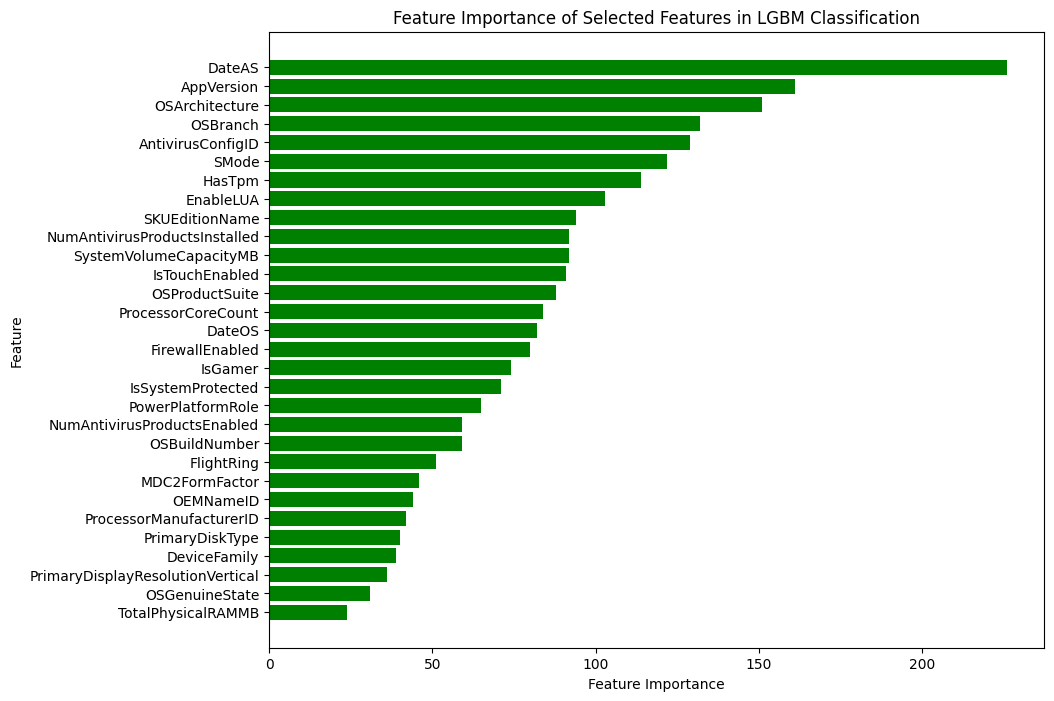

In [47]:
# Convert NumPy arrays back to DataFrame for feature selection and correlation analysis
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numerical_cols + categorical_cols)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols + categorical_cols)
test_scaled = pd.DataFrame(test_scaled, columns=numerical_cols + categorical_cols)

# Get feature importances
importances = model.feature_importances_
cor = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()
cor_pairs = cor.unstack().sort_values(ascending=False)
cor_pairs = cor_pairs[(cor_pairs > 0.8) & (cor_pairs < 1)].drop_duplicates()

feature_importance_dict = dict(zip(X_train.columns, importances))
features_to_drop = []

for feature_1, feature_2 in cor_pairs.index:
    if feature_importance_dict[feature_1] < feature_importance_dict[feature_2]:
        features_to_drop.append(feature_1)
    else:
        features_to_drop.append(feature_2)

features_to_drop = list(set(features_to_drop))


# Select top 30 important features
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
selected_features_lgbm = [feature for feature, importance in sorted_features if feature not in features_to_drop][:30]

print(f" Features to drop ({len(features_to_drop)}): {features_to_drop}")
print(f"Selected Features ({len(selected_features_lgbm)}): {selected_features_lgbm}")

# Refit model with selected features
X_train_selected = X_train_scaled[selected_features_lgbm]
X_val_selected = X_val_scaled[selected_features_lgbm]
test_selected = test_scaled[selected_features_lgbm]

model.fit(X_train_selected, y_train)

# Evaluate on selected features
y_val_pred_selected = model.predict(X_val_selected)
accuracy_selected = accuracy_score(y_val, y_val_pred_selected)

print("\nLGBM Classifier Accuracy (Selected Features):", accuracy_selected)
print("\nLGBM Classification Report (Selected Features):\n", classification_report(y_val, y_val_pred_selected))

# Plot feature importances
plt.figure(figsize=(10, 8))
filtered_importances = {feature: importance for feature, importance in feature_importance_dict.items() if feature in selected_features_lgbm}
filtered_importances = dict(sorted(filtered_importances.items(), key=lambda x: x[1], reverse=True))

plt.barh(list(filtered_importances.keys()), filtered_importances.values(), color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Selected Features in LGBM Classification')
plt.gca().invert_yaxis()
plt.show()

It has been observed that the model has an accuracy of 0.6337 without feature selection, meanwhile only 0.629 with feature selection. Hence the hyperparameter tuning and cross validation wont be done on selected features.

### Hyper parameter tuning

In [48]:
# from sklearn.model_selection import RandomizedSearchCV

# model = LGBMClassifier(random_state=42)

# # Define the hyperparameter grid
# lgbm_dist = {
#     'n_estimators': [100, 300, 500],  
#     'learning_rate': [0.01, 0.05, 0.1],  
#     'max_depth': [-1, 5, 10],  
#     'num_leaves': [20, 31, 40],  
#     'min_child_samples': [10, 20, 30],  
#     'subsample': [0.8, 1.0],  
#     'colsample_bytree': [0.8, 1.0]  
# }


# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     model, param_distributions=lgbm_dist,
#     n_iter=20,  
#     scoring='accuracy',
#     cv=3,  
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  
# )

# # # Perform Randomized Search
# random_search.fit(X_train_scaled, y_train)

# # Best Model
# lgbm_model = random_search.best_estimator_

# # Evaluate Best Model
# y_val_pred = lgbm_model.predict(X_val_scaled)
# lgbm_accuracy = accuracy_score(y_val, y_val_pred)
# print("\nBest LightGBM Classifier Accuracy:", lgbm_accuracy)
# cm = confusion_matrix(y_val, y_val_pred)

# print("Confusion Matrix:\n", cm)
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


### Conclusion
* Validation set accuracy is 0.634 after hyperparameter tuning
* Best params: {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

## **Model 3: Random Forest Classifier**

Robust, easy to tune, less prone to overfitting, and provides feature importance for interpretability.  

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_val_pred_rf = model_rf.predict(X_val_scaled)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print("\nRandom Forest Classifier Accuracy:", rf_accuracy)
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)
print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_val_pred_rf))


Random Forest Classifier Accuracy: 0.6274
Confusion Matrix:
 [[2921 2027]
 [1636 3416]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      4948
           1       0.63      0.65      0.64      5052

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



### Feature selection

 Features to drop (14): ['OSBuildNumberOnly', 'ProcessorManufacturerID', 'SignatureVersion', 'ProductName', 'PrimaryDisplayResolutionVertical', 'OSBuildNumber', 'OSInstallLanguageID', 'OSArchitecture', 'OSSkuFriendlyName', 'OSVersion', 'OsPlatformSubRelease', 'PrimaryDiskCapacityMB', 'EngineVersion', 'SKUEditionName']
Selected Features (30): ['AntivirusConfigID', 'NumAntivirusProductsInstalled', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorModelID', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'InternalBatteryNumberOfCharges', 'OSBuildRevisionOnly', 'OSUILocaleID', 'FirmwareManufacturerID', 'FirmwareVersionID', 'RegionIdentifier', 'AppVersion', 'OSBuildLab', 'ChassisType', 'NumericOSVersion', 'OSInstallType', 'AutoUpdateOptionsName', 'LicenseActivationChannel', 'DateAS', 'DateOS']

Random Forest Classifier Accuracy (Selected 

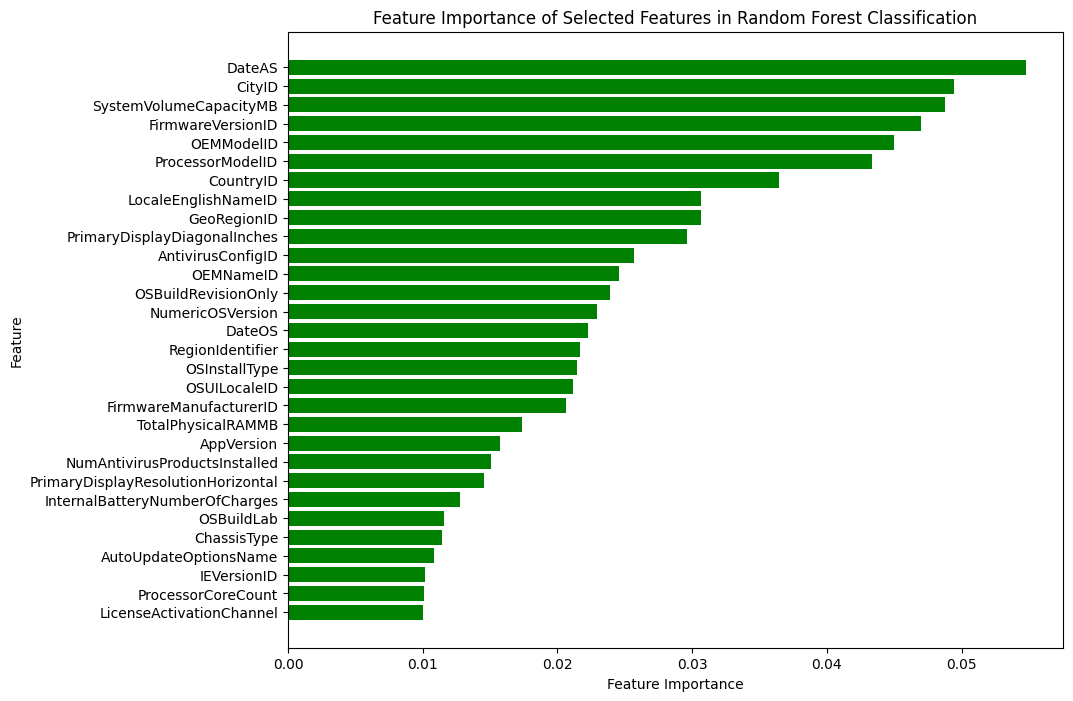

In [50]:
# Convert NumPy arrays back to DataFrame for feature selection and correlation analysis
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numerical_cols + categorical_cols)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols + categorical_cols)
test_scaled = pd.DataFrame(test_scaled, columns=numerical_cols + categorical_cols)

# Feature importance and correlation filtering for Random Forest
importances_rf = model_rf.feature_importances_
cor = X_train_scaled.corr()
cor_pairs = cor.unstack().sort_values(ascending=False)
cor_pairs = cor_pairs[(cor_pairs > 0.8) & (cor_pairs < 1)].drop_duplicates()
feature_importance_dict_rf = dict(zip(X_train_scaled.columns, importances_rf))

features_to_drop_rf = []
for feature_1, feature_2 in cor_pairs.index:
    if feature_importance_dict_rf[feature_1] < feature_importance_dict_rf[feature_2]:
        features_to_drop_rf.append(feature_1)
    else:
        features_to_drop_rf.append(feature_2)
features_to_drop_rf = list(set(features_to_drop_rf))

selected_features_rf = [
    feature for feature, importance in feature_importance_dict_rf.items()
    if importance > 0.01 and feature not in features_to_drop_rf
]
print(f" Features to drop ({len(features_to_drop_rf)}): {features_to_drop_rf}")
print(f"Selected Features ({len(selected_features_rf)}): {selected_features_rf}")

# Refit Random Forest model on selected features
X_train_selected_rf = X_train_scaled[selected_features_rf]
X_val_selected_rf = X_val_scaled[selected_features_rf]
test_selected_rf = test_scaled[selected_features_rf]

model_rf.fit(X_train_selected_rf, y_train)

y_val_pred_selected_rf = model_rf.predict(X_val_selected_rf)
rf_accuracy_selected = accuracy_score(y_val, y_val_pred_selected_rf)

print("\nRandom Forest Classifier Accuracy (Selected Features):", rf_accuracy_selected)
print("\nRandom Forest Classification Report (Selected Features):\n", classification_report(y_val, y_val_pred_selected_rf))

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 8))
filtered_importances_rf = {feature: importance for feature, importance in feature_importance_dict_rf.items() if feature in selected_features_rf}
filtered_importances_rf = dict(sorted(filtered_importances_rf.items(), key=lambda x: x[1], reverse=True))
plt.barh(list(filtered_importances_rf.keys()), filtered_importances_rf.values(), color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Selected Features in Random Forest Classification')
plt.gca().invert_yaxis()
plt.show()

It has been observed that the model has an accuracy of 0.6217 without feature selection, and 0.621 with feature selection. Hence the hyperparameter tuning and cross validation wont be done on selected features

### Hyper parameter tuning

In [51]:
# from sklearn.model_selection import RandomizedSearchCV

# # Initialize Random Forest model
# model = RandomForestClassifier(random_state=42, n_jobs=-1)

# # Define the hyperparameter grid
# rf_dist = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     model, param_distributions=rf_dist,
#     n_iter=10,  # Number of different combinations to try
#     scoring='accuracy',
#     cv=3,  # Cross-validation folds
#     verbose=1,
#     random_state=42,
#     n_jobs=-1  # Use all available CPU cores
# )

# # Perform Randomized Search
# random_search.fit(X_train_scaled, y_train)

# # Best Model
# rf_model = random_search.best_estimator_
# # Evaluate Best Model
# y_val_pred = rf_model.predict(X_val_scaled)

# rf_accuracy = accuracy_score(y_val, y_val_pred)
# print("\nBest Random Forest Classifier Accuracy:", rf_accuracy)
# cm = confusion_matrix(y_val, y_val_pred)

# print("Confusion Matrix:\n", cm)
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

### Conclusion
* Validation set accuracy is 0.6308 after hyperparameter tuning
* Best params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}

### **Model Comparison after hyper parameter tuning:**


Model Comparison after hyper parameter tuning:
XGBoost - Validation Accuracy: 0.6347 
LightGBM  - Validation Accuracy: 0.634
RandomForest - Validation Accuracy: 0.6308


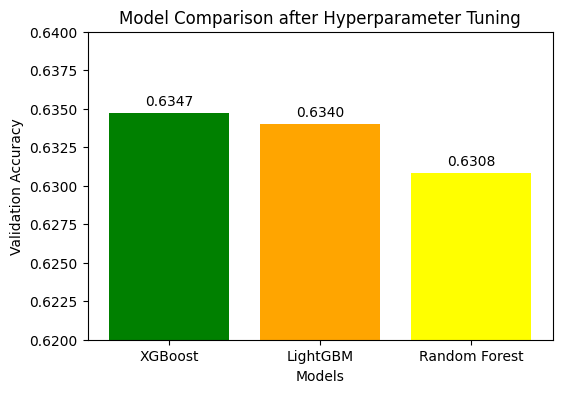

In [52]:
print("\nModel Comparison after hyper parameter tuning:")
print(f"XGBoost - Validation Accuracy: 0.6347 ")
print(f"LightGBM  - Validation Accuracy: 0.634")
print(f"RandomForest - Validation Accuracy: 0.6308")
models=['XGBoost','LightGBM','Random Forest']
accuracy=[0.6347,0.634,0.6308]
plt.figure(figsize=(6,4))
plt.bar(models, accuracy, color=['green', 'orange','yellow'])
for i in range(len(models)):
    plt.text(i, accuracy[i] + 0.0005, f"{accuracy[i]:.4f}", ha='center', fontsize=10)
    
plt.xlabel("Models")
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison after Hyperparameter Tuning")
plt.ylim(0.62, 0.64)  # Adjust y-axis range
plt.show()

* **XGBoost Classifier model gives the most accuracy score after tuning**
* **The second best accuracy given by LightGBM Classifier**
* **The least accuracy is given by Random Forest Classifier**

#  **BEST MODEL : XGBOOST CLASSIFIER**

We chose the XGBoost classifier over other models because it consistently delivered the best performance during training. After hyperparameter tuning and cross-validation, XGBoost achieved the highest accuracy score (0.639) compared to other models like Lightgbm and Random Forest

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from xgboost import XGBClassifier 
# Initialize XGBoost model
model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False , eval_metric='logloss' 
)


# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 300, 500],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 6, 10],  # Maximum tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weights needed in a child node
    'subsample': [0.7, 0.8, 1.0],  # Fraction of training samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used per tree
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=20,  # Number of different combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,  #Basic logs, shows progress
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    error_score='raise'  # Raise an error if a setting fails
)

# Perform the randomized search on the original scaled training dataset
random_search.fit(X_train_scaled, y_train)  

# Retrieve the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Evaluate Best Model
y_val_pred = best_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print("\nBest XGBoost Classifier Accuracy:", accuracy) 
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# # Training Accuracy
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation Accuracy
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


# Make test predictions
y_test_pred = best_model.predict(test_scaled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best XGBoost Classifier Accuracy: 0.6347
Confusion Matrix:
 [[2957 1991]
 [1662 3390]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62      4948
           1       0.63      0.67      0.65      5052

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

Training Accuracy: 0.7024
Validation Accuracy: 0.6347


# SUBMISSION

In [54]:
# Prepare submission file
sample_data['target'] = y_test_pred
sample_data.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
